In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
from scipy.stats import mannwhitneyu

In [3]:
import warnings
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from os.path import join
from IPython import display
from sklearn.datasets import load_digits
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score # и другие метрики
from sklearn.cluster import KMeans # а также другие алгоритмы
from sklearn.preprocessing import StandardScaler

In [4]:
ppalette={'senior academics':'r', 'students':'g'}

In [5]:
from scipy.stats import f_oneway

In [6]:
from statsmodels.multivariate.manova import MANOVA

In [7]:
from scipy.stats.mstats import kruskal

In [8]:
#!pip install scikit-posthocs

In [9]:
import scikit_posthocs as sp

In [10]:

%load_ext autoreload
%autoreload 2

from stats import full_bootstrap_mean_diff, bootstrap_expected_mean_difference

## preprocessing

In [11]:
students = pd.read_csv('students.tsv',sep='\t' )
dolgolets = pd.read_csv('dolgolets.tsv', sep = '\t')

In [12]:
students.shape

(1295, 17)

In [13]:
dolgolets.shape

(1273, 19)

In [14]:
students.columns = ['ID', 'квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква',
       'Стратегия', 'Порядок_буква', 'Порядок_весь_тест', 'Частотность',
       'Пауза', 'VP', 'VS', 'N of words', 'N of words_P', 'N of words_O',
       'N of words_S', 'Mean pause']

dolgolets.loc[(dolgolets['ID']=='pr_A_1') & (dolgolets['Слово']=='оква'), 'Стратегия']=11
dolgolets.loc[(dolgolets['ID']=='pr_G_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=1
dolgolets.loc[(dolgolets['ID']=='pr_I_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=3
dolgolets.loc[(dolgolets['ID']=='pr_K_1') & (dolgolets['Стратегия']=='9'),'Стратегия']=2
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='овеин'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='сапан'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_M_2') & (dolgolets['Стратегия']=='9') ,'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='олелуй'),'Стратегия']=1
dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='сопсизм'),'Стратегия']=8
dolgolets.loc[(dolgolets['ID']=='pr_S_1') & (dolgolets['Стратегия']=='9') ,'Стратегия']=4
dolgolets.loc[(dolgolets['ID']=='pr_T_1') & (dolgolets['Стратегия']=='9') ,'Стратегия']=8


dolgolets.loc[(dolgolets['ID']=='pr_N_2') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='перл'), 'Стратегия' ]=8
dolgolets.loc[(dolgolets['ID']=='pr_L_1') & (dolgolets['Стратегия']=='9') & (dolgolets['Слово']=='скрип'),'Стратегия'] = 11

dolgolets = dolgolets[students.columns]
dolgolets['type'] = 'senior academics'
students['type'] = 'students'

df = pd.concat([students, dolgolets])

df['Стратегия'] = df['Стратегия'].astype(str)
#df[df['Стратегия'].notnull()].Стратегия.astype('int32', errors = 'ignore')
df['Стратегия'] = df['Стратегия'].str.replace(r'.0', '')
df['Частотность'] = df['Частотность'].str.replace(r',', '.')
df['Частотность'] = df['Частотность'].astype('float', errors = 'ignore')
df['Пауза'] = df['Пауза'].str.replace(r',', '.')
df['Пауза'] = df['Пауза'].astype('float', errors='ignore' )
df['Порядок_буква'] = df['Порядок_буква'].astype(str)
df['Порядок_буква'] = df['Порядок_буква'].str.replace(r'.0', '')
df['Предыдущее + слово'] = df['Предыдущее + слово'].str.split(' ')

df1 = df.groupby("ID").agg(list)
df1['N of words_O'] = df1['N of words_O'].str[0]
df1['N of words'] = df1['N of words'].str[0]
df1['N of words_P'] = df1['N of words_P'].str[0]
df1['N of words_S'] = df1['N of words_S'].str[0]
df1['Mean pause'] = df1['Mean pause'].str[0]
df1['type'] = df1['type'].str[0]

In [15]:
def count_values_freq(lst):
    freq_dict = {}
    for value in lst:
        if value in freq_dict:
            freq_dict[value] += 1
        else:
            freq_dict[value] = 1
    return freq_dict
df1['strategyfreq_dict'] = df1['Стратегия'].apply(count_values_freq)

In [16]:
df = df1[['strategyfreq_dict']]

def expand_dict_column(row):
    for key, value in row['strategyfreq_dict'].items():
        row[key] = int(value)
    return row

# Применяем функцию к каждой строке DataFrame
df = df.apply(expand_dict_column, axis=1)

# Удаляем столбец со словарями (если требуется)
#df.drop('dict_column', axis=1, inplace=True)



# Выводим DataFrame с новыми столбцами
df = df.fillna(0)
df['1'] = df['1'] + df['11'] + df['1а']
df['2'] = df['2'] + df['22'] + df['2а']
df['3'] = df['3'] + df['33'] + df['3a'] + df['3а'] + df['3а’']
df['4'] = df['4'] + df['4а']
df['6'] = df['6'] + df['66']

columns_to_drop = ['11', '1а', '22', '2а',  '33', '3a', '3а', '3а’', '4а', '66']
df = df.drop(columns=columns_to_drop)

df['fonetics'] = df['1'] 
df['derivation'] = df['2']
df['lexico-semantic field'] = df['3'] + df['4'] + df['5'] + df['6'] + df['7']
df['other'] = df['8']
columns_to_drop = ['1', '2', '3', '4',  '5', '6', '7', '8']
df = df.drop(columns=columns_to_drop)
df.columns
df = df.drop(['nan'], axis=1)
df.head()
df = df.drop(['strategyfreq_dict'], axis = 1)

df['strat_sum'] = df['fonetics'] + df['derivation'] + df['lexico-semantic field'] + df['other']

dff = df.copy()
for col in dff.columns[:-1]:  # Исключаем последний столбец strat_sum
    dff[col] = dff[col] / df['strat_sum']

dff = dff.drop(['strat_sum'], axis = 1)
dff.head()

,fonetics,derivation,lexico-semantic field,other
ID,,,,
pr_A_1,0.227273,0.113636,0.295455,0.363636
pr_B_1,0.196078,0.058824,0.313725,0.431373
pr_E_1,0.096154,0.019231,0.192308,0.692308
pr_G_1,0.254545,0.018182,0.127273,0.600000
pr_I_1,0.083333,0.020833,0.187500,0.708333


In [17]:
df.head()

,fonetics,derivation,lexico-semantic field,other,strat_sum
ID,,,,,
pr_A_1,10.0,5.0,13.0,16,44.0
pr_B_1,10.0,3.0,16.0,22,51.0
pr_E_1,5.0,1.0,10.0,36,52.0
pr_G_1,14.0,1.0,7.0,33,55.0
pr_I_1,4.0,1.0,9.0,34,48.0


In [18]:
df1.columns

Index(['квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква', 'Стратегия',
       'Порядок_буква', 'Порядок_весь_тест', 'Частотность', 'Пауза', 'VP',
       'VS', 'N of words', 'N of words_P', 'N of words_O', 'N of words_S',
       'Mean pause', 'type', 'strategyfreq_dict'],
      dtype='object')

In [19]:
analysis_df = df1[['квота сек', 'Первая_буква',
       'Порядок_буква', 'Порядок_весь_тест','Частотность', 'strategyfreq_dict','Пауза', 
       'Mean pause', 'type']]

analysis_df = pd.concat([analysis_df, dff], axis=1)

## Tasks
Ariuna, [30.03.2024 20:21]
стратегия - частотность слова (по тем рангам), стратегия - пауза.

Ariuna, [30.03.2024 20:24]
внутри какой стартегии длящейся пауза меньше, в какой большей (какая из этих стратегий является более эффективной в плане энергии)

Ariuna, [30.03.2024 20:33]
1) длительные стратегии - пауза внутри длительной стратегии
2) паузы между любыми переключениями  - (вторая строка)

Ariuna, [30.03.2024 20:40]
посмотреть для каждой стратегии - частотсноти слов (предварительно их проранжировать)

Ariuna, [30.03.2024 20:54]
скаттерплот пауза= частность слова- хуе = студенты и долголеты

In [20]:
students.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,NaN,1,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8.0,2,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11.0,3,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8.0,4,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3.0,5,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [21]:
concats = pd.concat([students, dolgolets])
concats.head()
df = concats
df['Стратегия'] = df['Стратегия'].astype(str)
#df[df['Стратегия'].notnull()].Стратегия.astype('int32', errors = 'ignore')
df['Стратегия'] = df['Стратегия'].str.replace(r'.0', '')
df['Частотность'] = df['Частотность'].str.replace(r',', '.')
df['Частотность'] = df['Частотность'].astype('float', errors = 'ignore')
df['Пауза'] = df['Пауза'].str.replace(r',', '.')
df['Пауза'] = df['Пауза'].astype('float', errors='ignore' )
df['Порядок_буква'] = df['Порядок_буква'].astype(str)
df['Порядок_буква'] = df['Порядок_буква'].str.replace(r'.0', '')
df['Предыдущее + слово'] = df['Предыдущее + слово'].str.split(' ')
concats.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,nan,1,1,152.7,NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,"[пара, период]",п,8,2,2,204.2,0.10,NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,"[период, парад]",п,11,3,3,13.2,3.15,1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,5786.7,0.70,NaN,NaN,59,28,13,18,"2,390357143",students


In [22]:
df = df.fillna('0')
df['Стратегия'] = df['Стратегия'].str[0]
def renamestrats(row):
    '''
    df['fonetics'] = df['1'] 
    df['derivation'] = df['2']
    df['lexico-semantic field'] = df['3'] + df['4'] + df['5'] + df['6'] + df['7']
    df['other'] = df['8']

    '''
    
    
    stratsfict = {'1':'fonetics', '2': 'derivation', 
                  '8':'other', **dict.fromkeys(['n', '0'], 'None')
                  }
    stratsfict.update(dict.fromkeys(['3', '4', '5', '6', '7'], 'lexico-semantic field'))
    #print(stratsfict[row['Стратегия']])
    row['strategies']=stratsfict[row['Стратегия']]
    return row

df = df.apply(renamestrats, axis=1)
df['Частотность'] = df['Частотность'].astype('float', errors = 'ignore')
df['Пауза'] = df['Пауза'].astype('float', errors='ignore' )
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
0,Б_В_10,1,пара,0,п,n,1,1,152.7,0.00,0,0,59,28,13,18,"2,390357143",students,None
1,Б_В_10,1,период,"[пара, период]",п,8,2,2,204.2,0.10,0,0,59,28,13,18,"2,390357143",students,other
2,Б_В_10,1,парад,"[период, парад]",п,1,3,3,13.2,3.15,1.0,0,59,28,13,18,"2,390357143",students,fonetics
3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,0,59,28,13,18,"2,390357143",students,other
4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,5786.7,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field


In [23]:
df[np.abs(stats.zscore(df['Частотность'])) > 3]

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,5786.7,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field
217,Г_Ю_13,2,сам,"[сирота, сам]",с,3,10,33,1986.3,5.02,0,0,39,16,7,16,"3,866111111",students,lexico-semantic field
374,К_М_17,1,по,0,п,n,1,1,5786.7,0.00,0,0,38,13,12,13,"4,483428571",students,None
539,Л_Д_11,2,с,"[сурок, с]",с,8,12,38,11311.9,7.35,1.0,0,46,19,7,20,"2,540697674",students,other
875,С_А_4,1,по,"[пре, по]",п,3,9,9,5786.7,1.03,1.0,0,43,18,12,13,"3,05575",students,lexico-semantic field
909,С_А_4,3,с,"[спылить, с]",с,8,13,43,11311.9,5.50,1.0,0,43,18,12,13,"3,05575",students,other
962,С_К_6,1,по,"[прыгнуть, по]",п,8,7,7,5786.7,2.47,1.0,0,54,23,10,21,"2,899411765",students,other
1086,Ф_Д_2,2,он,"[ом, он]",о,1,7,21,11791.1,6.92,0,0,38,14,9,15,"4,003714286",students,fonetics
1139,Х_М_3,2,скакать,"[сымпровизировать, скакать]",с,8,8,36,2396.6,9.79,1.0,0,40,17,11,12,"3,553783784",students,other
1264,Я_Д_18,2,по,"[поздно, по]",п,1,13,13,5786.7,0.36,0,0,43,18,10,15,"3,41375",students,fonetics


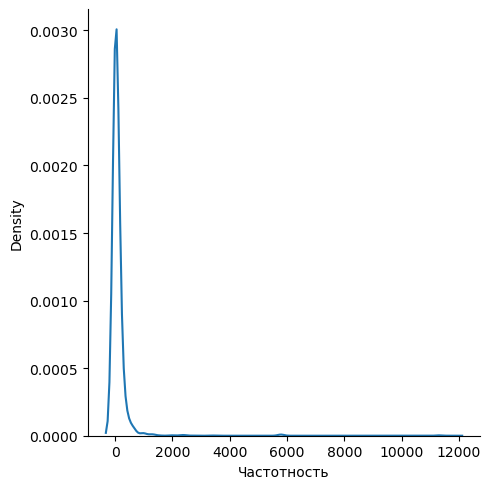

In [24]:
#sns.displot(df, x="Частотность", bins=20)
#https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

sns.displot(df, x="Частотность", kind="kde")

<Axes: xlabel='Частотность', ylabel='Пауза'>

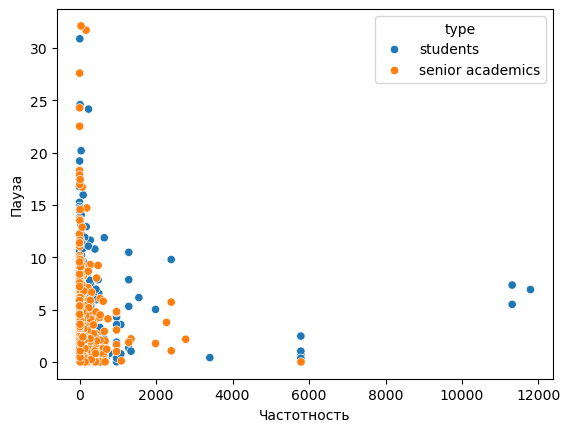

In [25]:
sns.scatterplot(data = df, x='Частотность',y='Пауза', hue='type')

In [26]:
cols = df.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
df_sub = df.loc[:, 'Частотность']


# OPTION 1: z-score filter: z-score < 3
#lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

# OPTION 2: quantile filter: discard 1% upper / lower values
#lim = np.logical_and(df_sub < df_sub.quantile(0.99, numeric_only=False),
#                     df_sub > df_sub.quantile(0.01, numeric_only=False))

# OPTION 3: iqr filter: within 2.22 IQR (equiv. to z-score < 3)
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22


# replace outliers with nan
df.loc[:, 'Частотность'] = df_sub.where(lim, np.nan)

In [27]:
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
0,Б_В_10,1,пара,0,п,n,1,1,152.7,0.00,0,0,59,28,13,18,"2,390357143",students,None
1,Б_В_10,1,период,"[пара, период]",п,8,2,2,NaN,0.10,0,0,59,28,13,18,"2,390357143",students,other
2,Б_В_10,1,парад,"[период, парад]",п,1,3,3,13.2,3.15,1.0,0,59,28,13,18,"2,390357143",students,fonetics
3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,0,59,28,13,18,"2,390357143",students,other
4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,NaN,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field


In [28]:
others = df[df['strategies'] == 'other']
others = others.reset_index()


In [29]:
df = df.reset_index() #важная часть кода
df["Частотность"] = df["Частотность"].fillna(220)

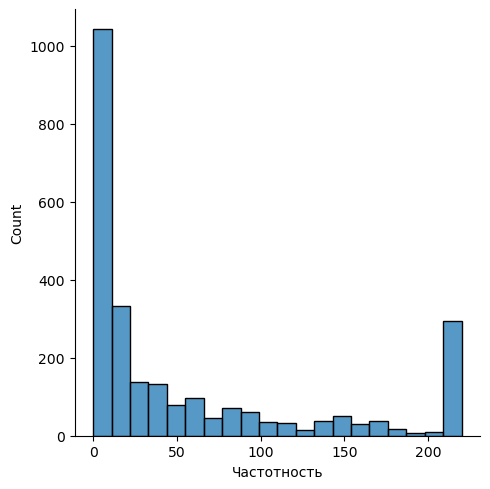

In [30]:

sns.displot(df, x="Частотность", bins = 20)

<Figure size 2400x1800 with 0 Axes>

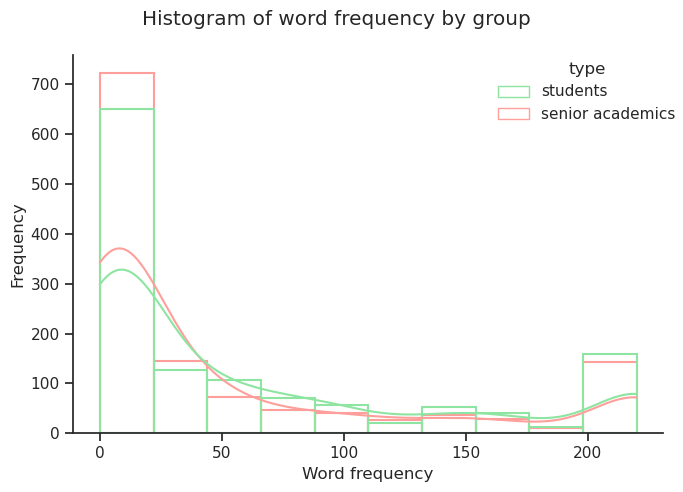

In [52]:

fig = plt.figure(figsize=(8, 6), dpi=300)
sns.set_theme(style="ticks", palette="pastel")

# Построение гистограммы с kde и разными цветами групп
g = sns.displot(
    data=df, x='Частотность', hue='type', bins=10, kde=True, fill=False,
    palette={'senior academics': 'r', 'students': 'g'}
)

# Настроим подписи и заголовок
g.set_axis_labels("Word frequency", "Frequency")
g.fig.suptitle("Histogram of word frequency by group")

# Настроим легенду, чтобы она находилась за пределами графика
g._legend.set_bbox_to_anchor((1, 0.8))

# Делаем так, чтобы график был вписан в черную рамку
plt.tight_layout()


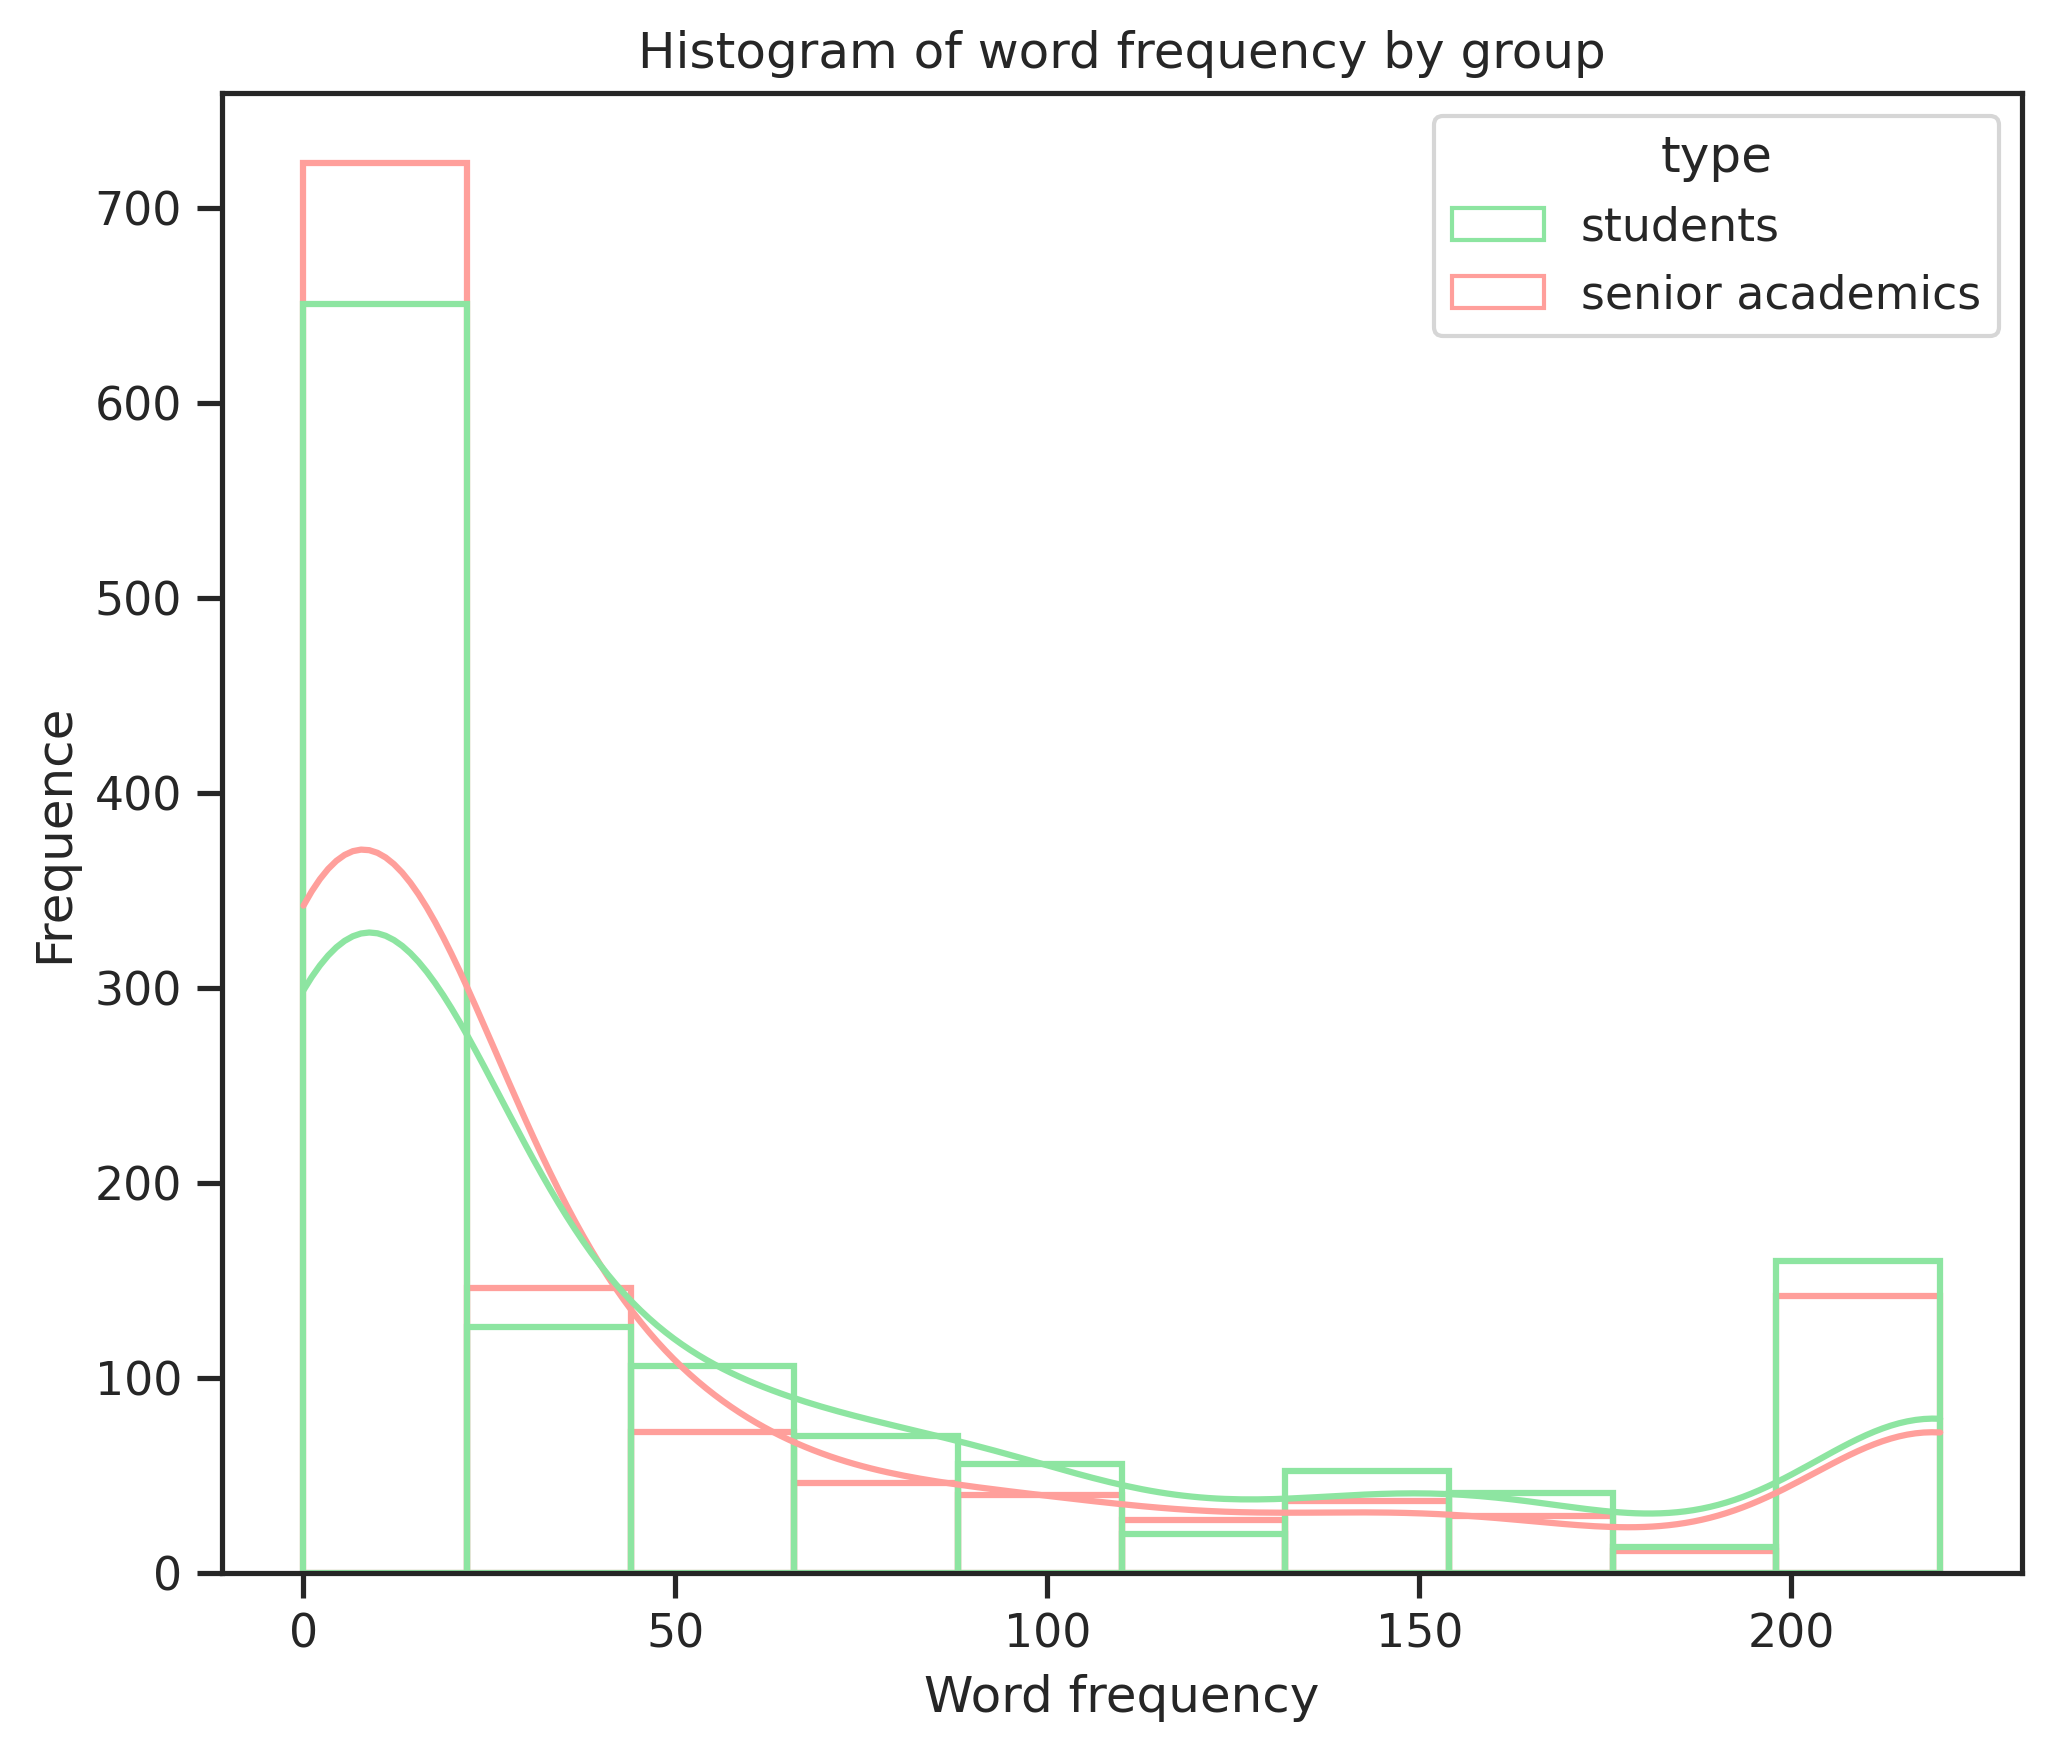

In [54]:

plt.figure(figsize=(7, 6), dpi=300)
sns.set_theme(style="ticks", palette="pastel")
sns.histplot(data = df, x='Частотность', hue='type', bins=10, kde=True, fill=False,
            palette={'senior academics':'r', 'students':'g'})
plt.xlabel('Word frequency')
plt.ylabel('Frequence')
plt.title(f'Histogram of word frequency by group')
# plt.legend(title="type", loc='upper right', bbox_to_anchor=(1.15, 1))
# plt.legend(title="Group", bbox_to_anchor=(1, 1))
plt.tight_layout()

Text(0.5, 1.0, 'Histogram of pause duration frequencies by group')

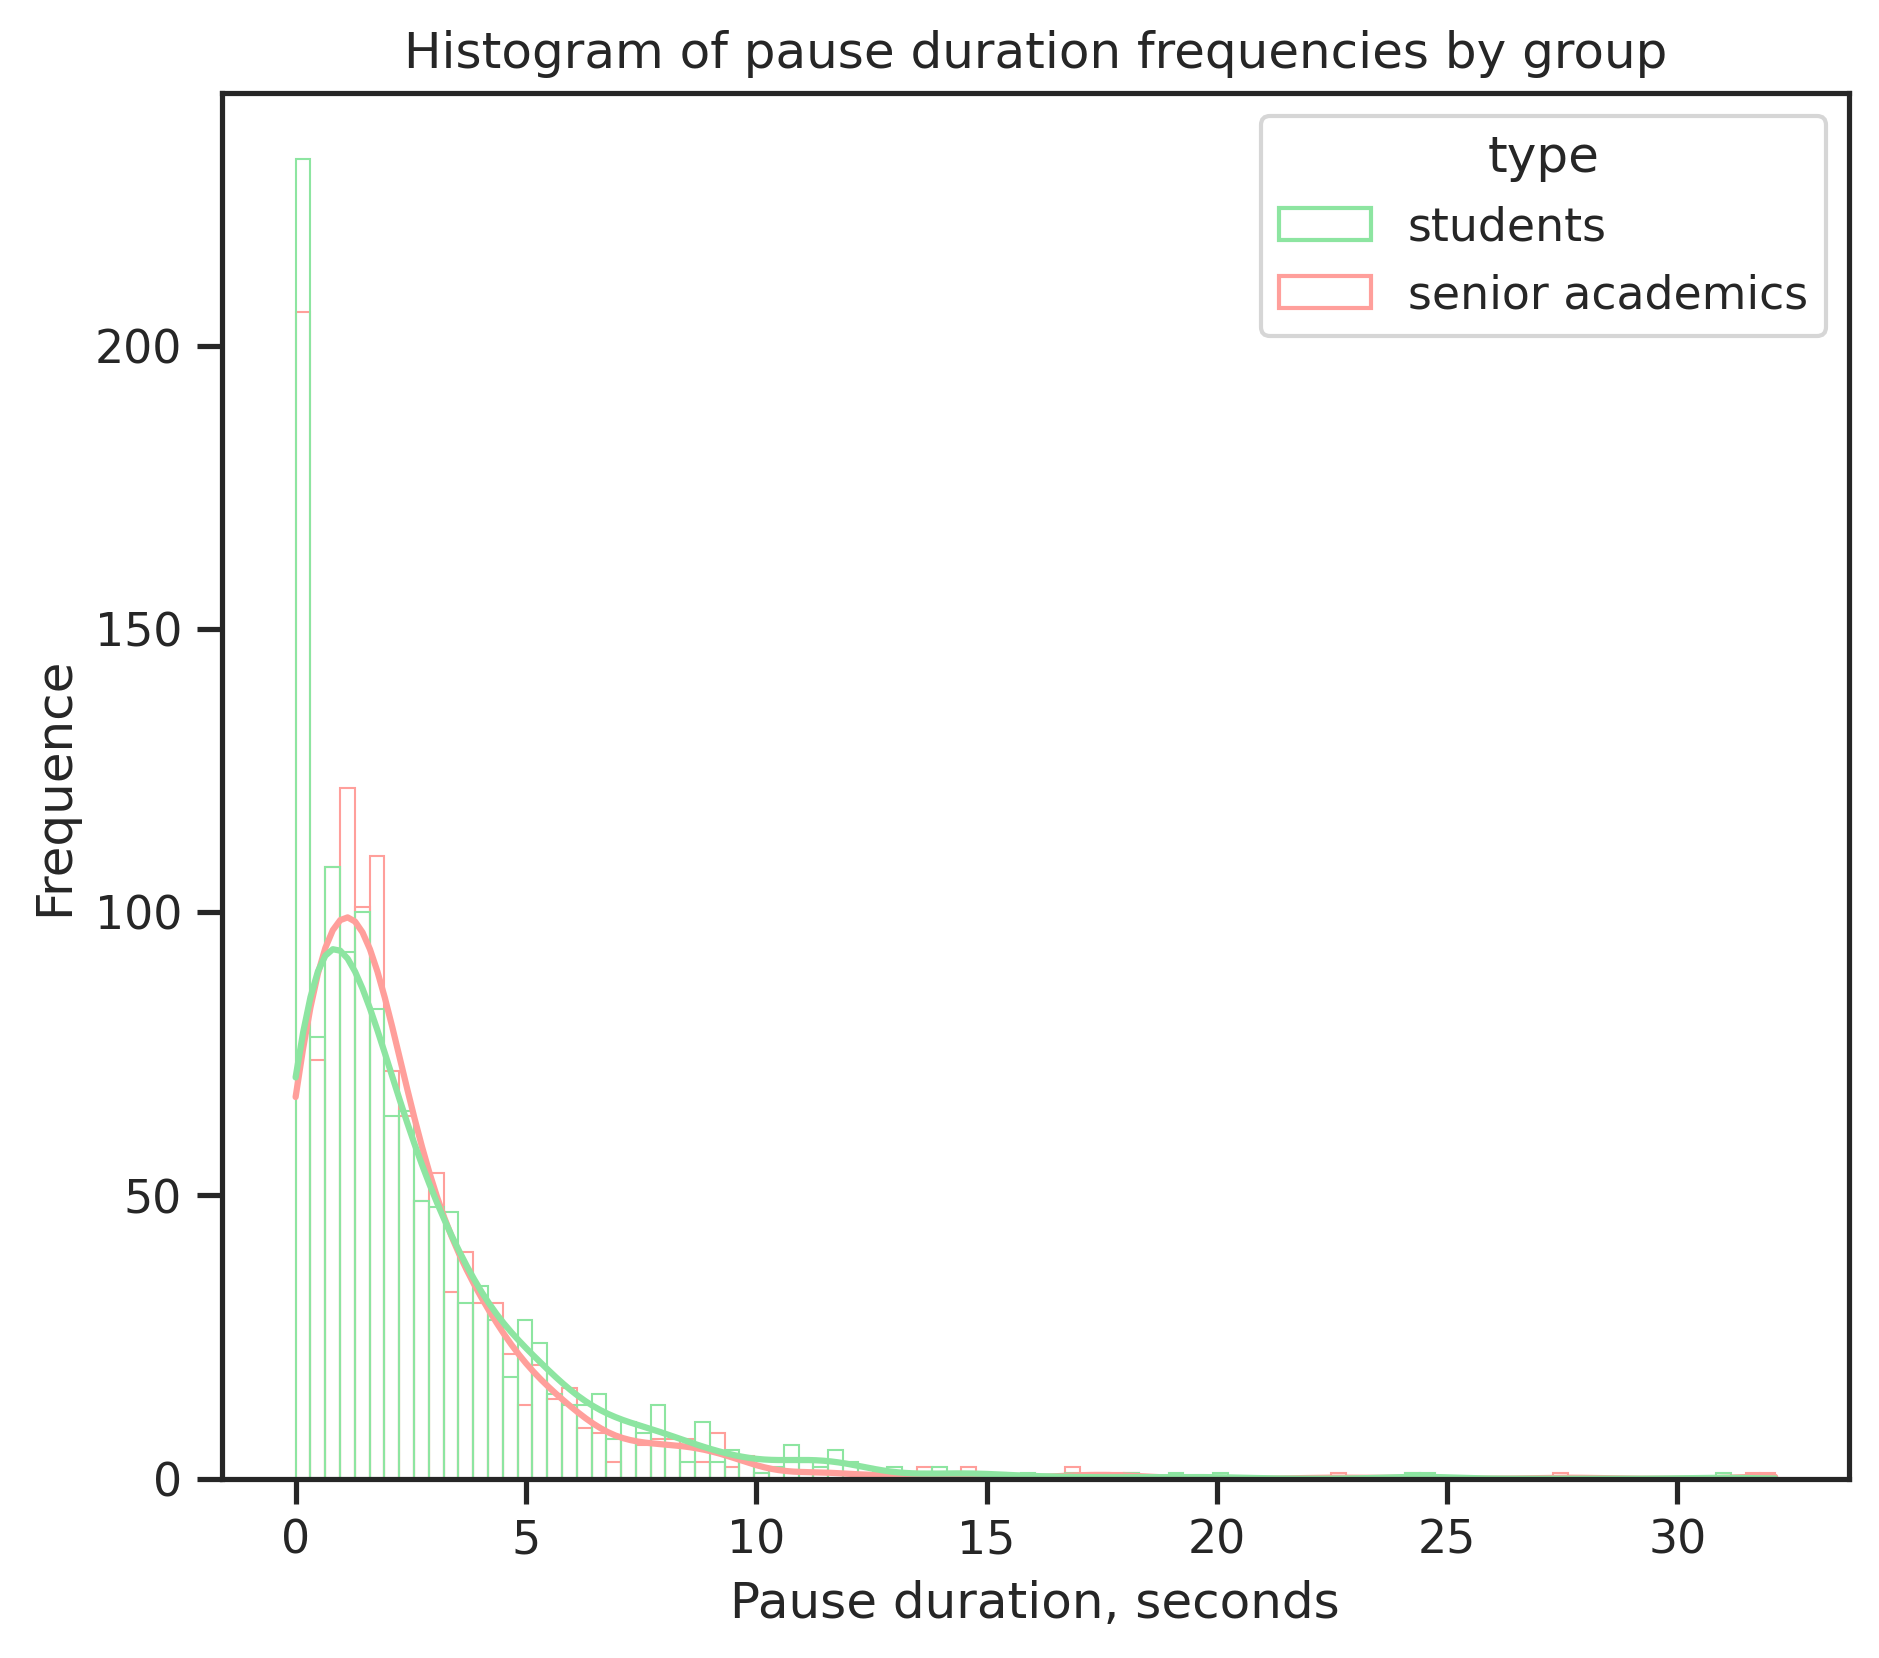

In [32]:
#sns.displot(data = df, x='Пауза', hue='type', kind='kde', fill=True)
plt.figure(figsize=(7, 6), dpi=300)
sns.set_theme(style="ticks", palette="pastel")
sns.histplot(data = df, x='Пауза', hue='type', bins=100, kde=True, fill=False, palette={'senior academics':'r', 'students':'g'})
plt.xlabel('Pause duration, seconds')
plt.ylabel('Frequence')
plt.title(f'Histogram of pause duration frequencies by group')

Text(0.5, 1.0, 'Histogram of word frequency by group')

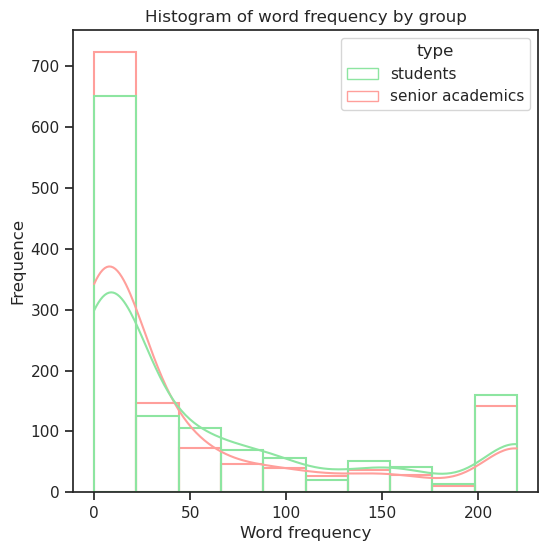

In [33]:
#sns.displot(data = df, x='Частотность', hue='type', kind='kde', fill=True)

plt.figure(figsize=(6, 6))
#sns.set_theme(style="ticks", palette="pastel")
sns.histplot(data = df, x='Частотность', hue='type', bins=10, kde=True, fill=False, palette={'senior academics':'r', 'students':'g'})
plt.xlabel('Word frequency')
plt.ylabel('Frequence')
plt.title(f'Histogram of word frequency by group')

Text(0.5, 1.0, 'Histogram of word frequency by group \nin "other" strategy')

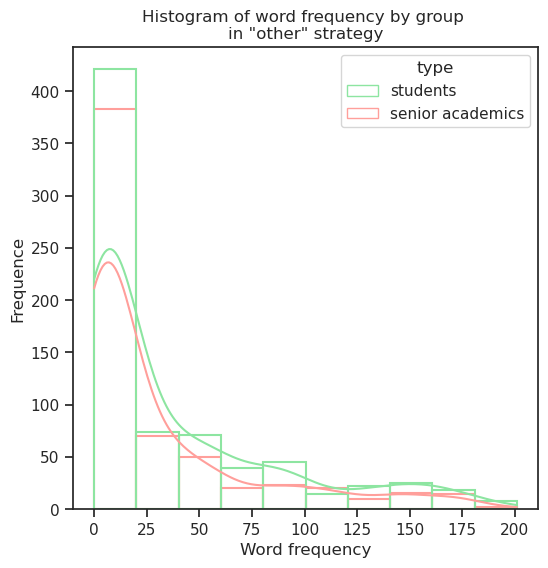

In [34]:
#sns.displot(data = others, x='Частотность', hue='type', kind='kde', fill=True)
plt.figure(figsize=(6, 6))
#sns.set_theme(style="ticks", palette="pastel")
sns.histplot(data = others, x='Частотность', hue='type', bins=10, kde=True, fill=False, palette={'senior academics':'r', 'students':'g'})
plt.xlabel('Word frequency')
plt.ylabel('Frequence')
plt.title(f'Histogram of word frequency by group \nin "other" strategy')

(0.0, 250.0)

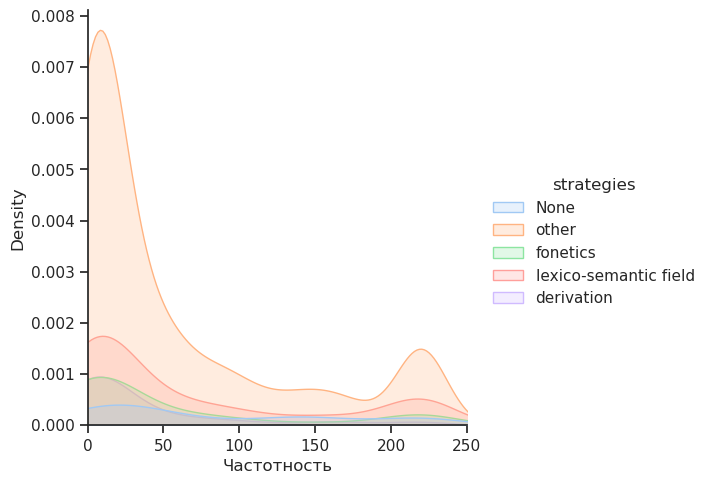

In [33]:
sns.displot(data = df, x='Частотность', hue='strategies', kind='kde', fill=True);
plt.xlim(0,250)

In [36]:
dfj = df[df['strategies'] !='None']

In [37]:
print(max(*dfj[dfj['strategies']=='other'].groupby('type')['Частотность'].apply(list)))

[220.0, 12.7, 18.5, 16.3, 2.1, 8.6, 2.4, 69.5, 84.2, 7.2, 3.4, 7.6, 13.1, 6.4, 155.0, 167.6, 69.5, 220.0, 95.7, 2.2, 220.0, 1.7, 2.4, 13.8, 142.4, 10.5, 152.7, 58.6, 165.2, 145.2, 1.3, 2.6, 0.4, 220.0, 8.1, 1.1, 13.5, 12.2, 4.4, 220.0, 1.6, 139.8, 1.8, 1.7, 220.0, 4.5, 220.0, 220.0, 6.0, 55.5, 3.8, 220.0, 7.9, 15.6, 220.0, 94.1, 2.3, 17.5, 14.5, 100.2, 32.7, 8.6, 64.2, 0.0, 1.2, 12.1, 0.0, 0.0, 9.9, 220.0, 220.0, 16.0, 11.1, 90.9, 0.0, 220.0, 1.9, 28.2, 92.2, 8.2, 20.4, 12.9, 43.5, 43.3, 7.5, 8.1, 10.5, 39.4, 121.3, 0.0, 1.9, 14.5, 23.5, 84.3, 0.0, 11.2, 181.9, 0.0, 180.2, 0.6, 0.0, 29.8, 38.1, 43.0, 139.8, 81.8, 54.9, 220.0, 148.7, 12.4, 1.0, 220.0, 0.0, 132.2, 9.4, 8.7, 6.5, 2.5, 1.6, 38.5, 220.0, 1.5, 5.3, 220.0, 136.7, 30.7, 4.1, 3.3, 160.1, 53.9, 15.6, 220.0, 35.7, 0.8, 40.7, 12.4, 7.6, 152.7, 29.0, 49.0, 4.9, 12.1, 42.6, 56.5, 0.0, 1.8, 8.5, 23.8, 20.5, 9.3, 220.0, 57.9, 29.7, 115.0, 154.4, 34.7, 51.7, 63.8, 220.0, 169.9, 10.5, 32.1, 44.8, 69.7, 38.8, 15.0, 220.0, 15.7, 20.1, 5.3

In [38]:
U1, p1 = mannwhitneyu(*dfj[dfj['strategies']=='other'].groupby('type')['Частотность'].apply(list))
U2, p2 = mannwhitneyu(*dfj[dfj['strategies']=='fonetics'].groupby('type')['Частотность'].apply(list))
U3, p3 = mannwhitneyu(*dfj[dfj['strategies']=='lexico-semantic field'].groupby('type')['Частотность'].apply(list))

U4, p4 = mannwhitneyu(*dfj[dfj['strategies']=='derivation'].groupby('type')['Частотность'].apply(list))

In [39]:
# B1, p1 = mannwhitneyu(*dfj[dfj['strategies']=='other'].groupby('type')['Частотность'].apply(list))
# B2, p2 = mannwhitneyu(*dfj[dfj['strategies']=='fonetics'].groupby('type')['Частотность'].apply(list))
# B3, p3 = mannwhitneyu(*dfj[dfj['strategies']=='lexico-semantic field'].groupby('type')['Частотность'].apply(list))

# B4, p4 = mannwhitneyu(*dfj[dfj['strategies']=='derivation'].groupby('type')['Частотность'].apply(list))

Text(2.7, 240, 'pval = 0.004')

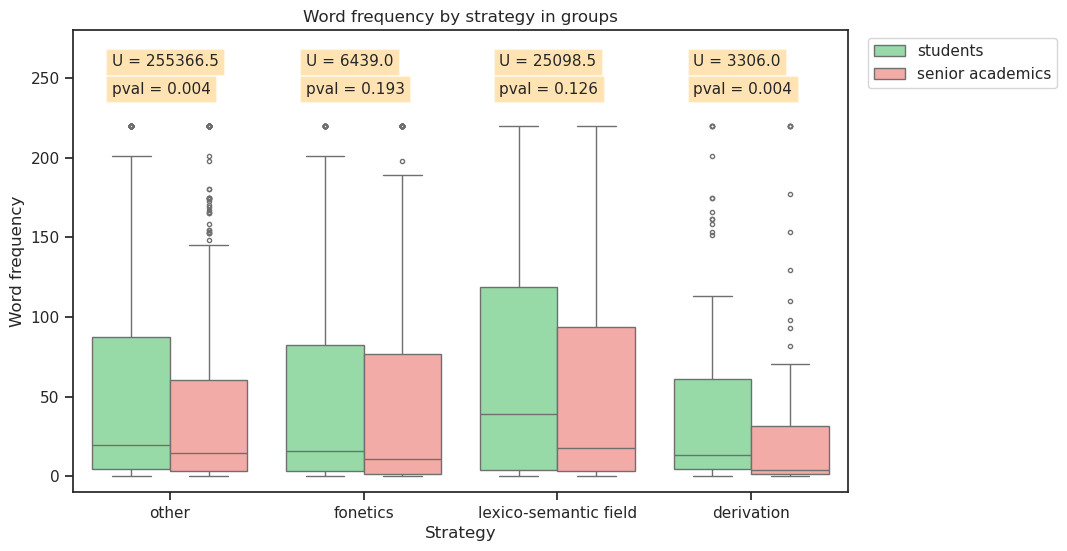

In [40]:

plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks", palette="pastel")
g = sns.boxplot(data = dfj, x='strategies',y='Частотность', hue='type', palette={'senior academics':'r', 'students':'g'}, fliersize=3);
plt.xlabel('Strategy')
plt.ylabel('Word frequency')
plt.title(f'Word frequency by strategy in groups')
g.legend( bbox_to_anchor=(1.28, 1))
plt.ylim((-10,280))

plt.text(-0.3, 257.5, f"U = {U1:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(-0.3, 240, f"pval = {p1:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(0.7, 257.5, f"U = {U2:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(0.7, 240, f"pval = {p2:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(1.7, 257.5, f"U = {U3:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(1.7, 240, f"pval = {p3:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(2.7, 257.5, f"U = {U4:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(2.7, 240, f"pval = {p4:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)       


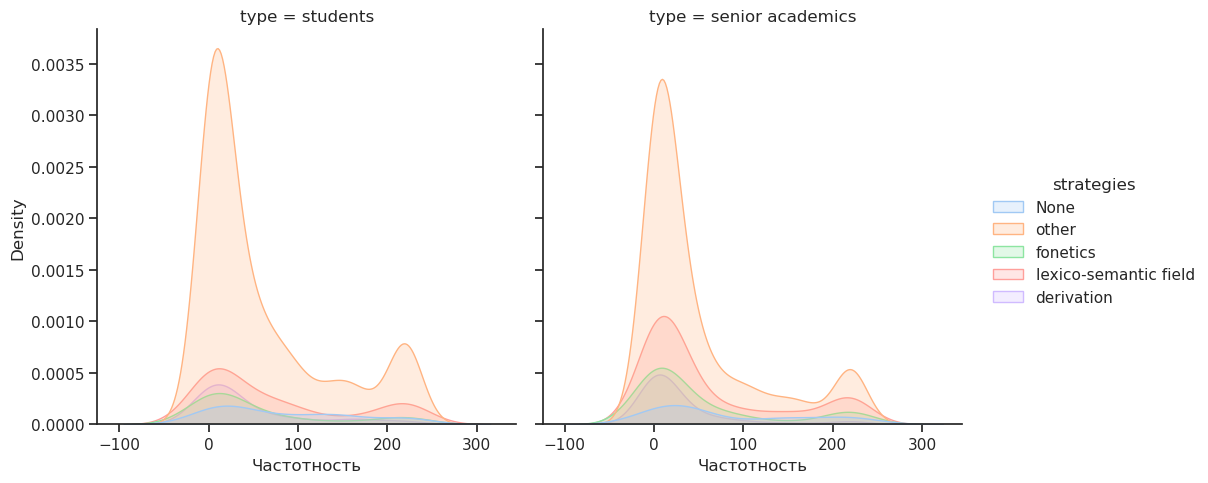

In [41]:
sns.displot(data = df, x='Частотность', hue='strategies', kind='kde', fill=True, col = 'type');

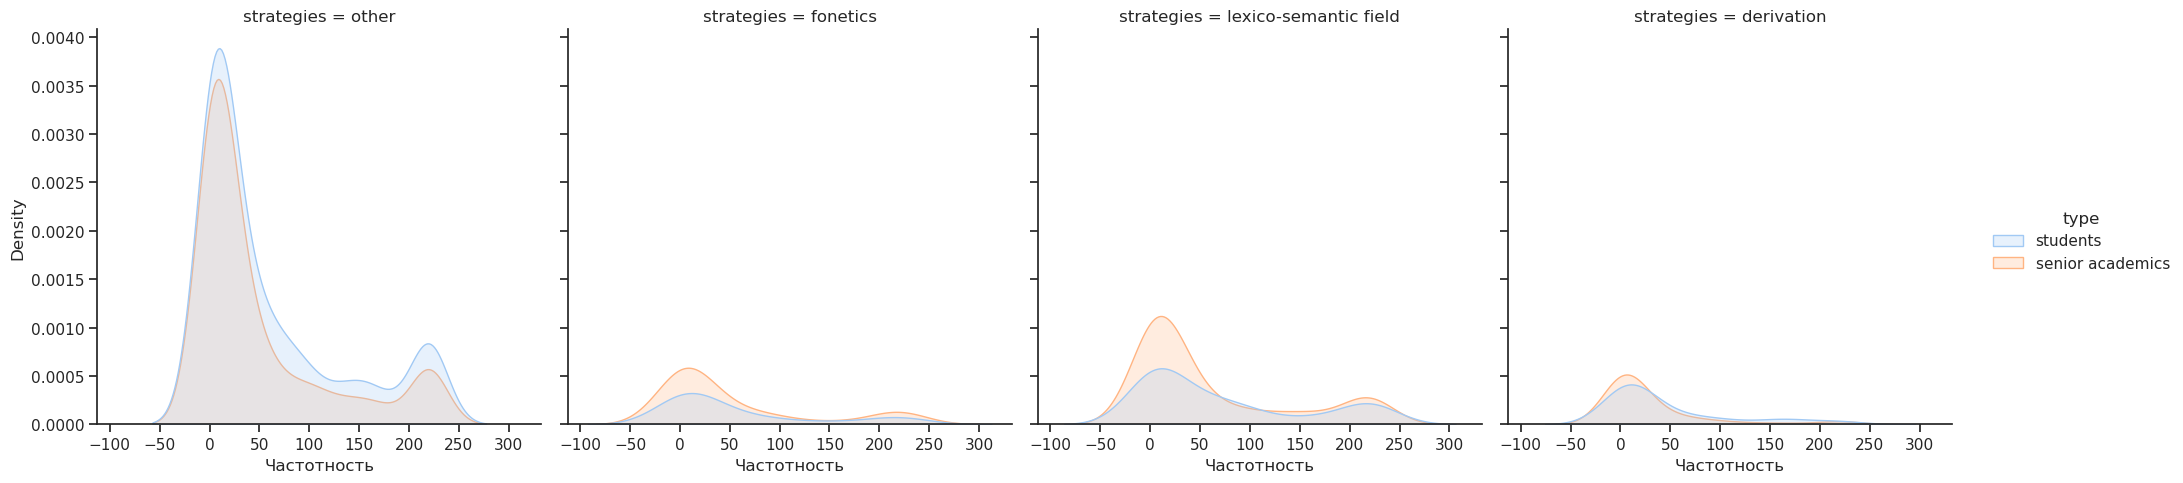

In [42]:
sns.displot(data = df[df['strategies']!='None'], x='Частотность', col='strategies', kind='kde', fill=True, hue = 'type');

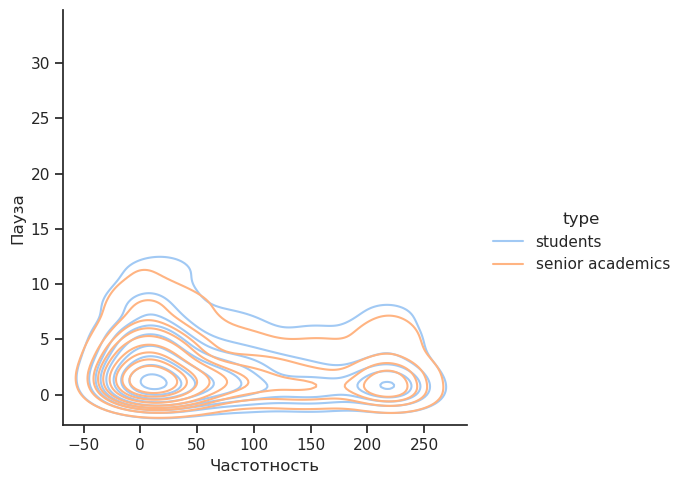

In [43]:
sns.displot(df, x='Частотность',y='Пауза', hue='type', kind="kde");

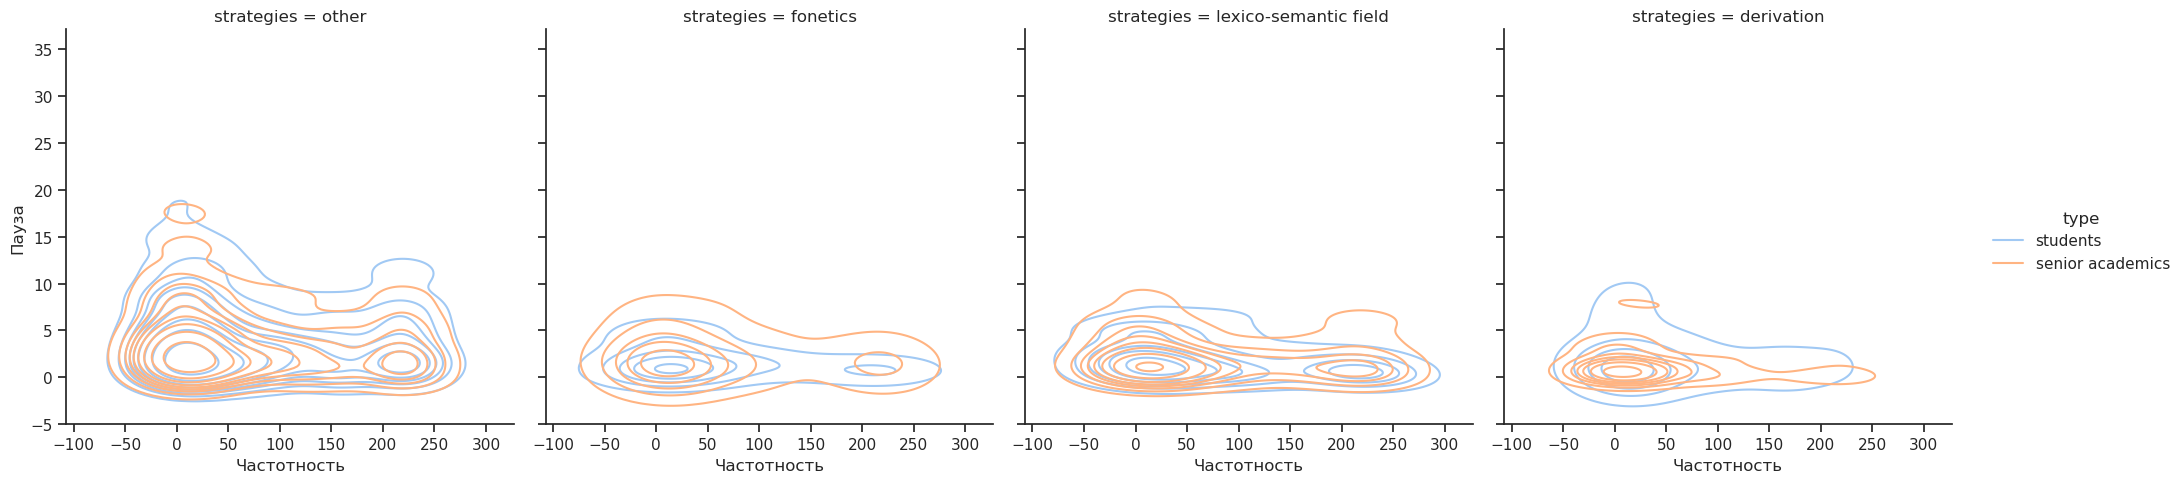

In [44]:
sns.displot(df[df['strategies']!='None'], x='Частотность',y='Пауза', hue='type', kind="kde", col='strategies');

In [45]:
#sns.displot(others, x='Частотность',y='Пауза', hue='type', kind="kde");

In [46]:
# sns.jointplot(
#     data = df, 
#     x='Частотность',y='Пауза', hue='type', kind="kde"
# )

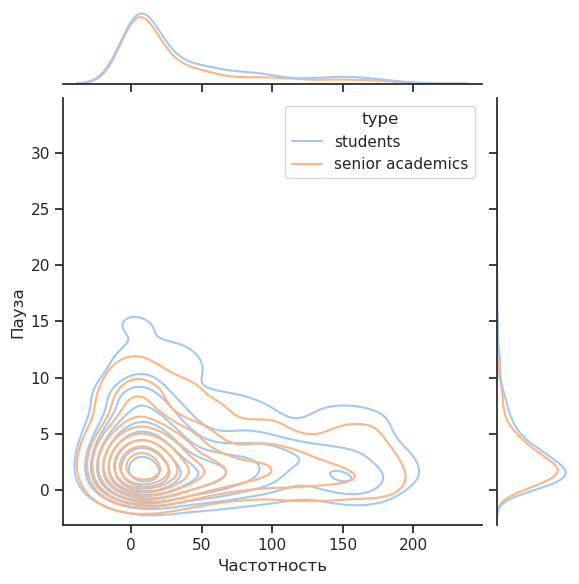

In [47]:
sns.jointplot(
    data = others, 
    x='Частотность',y='Пауза', hue='type', kind="kde"
)

Text(0.5, 1.0, 'Scatterplot word frequencies vs pause duration between words')

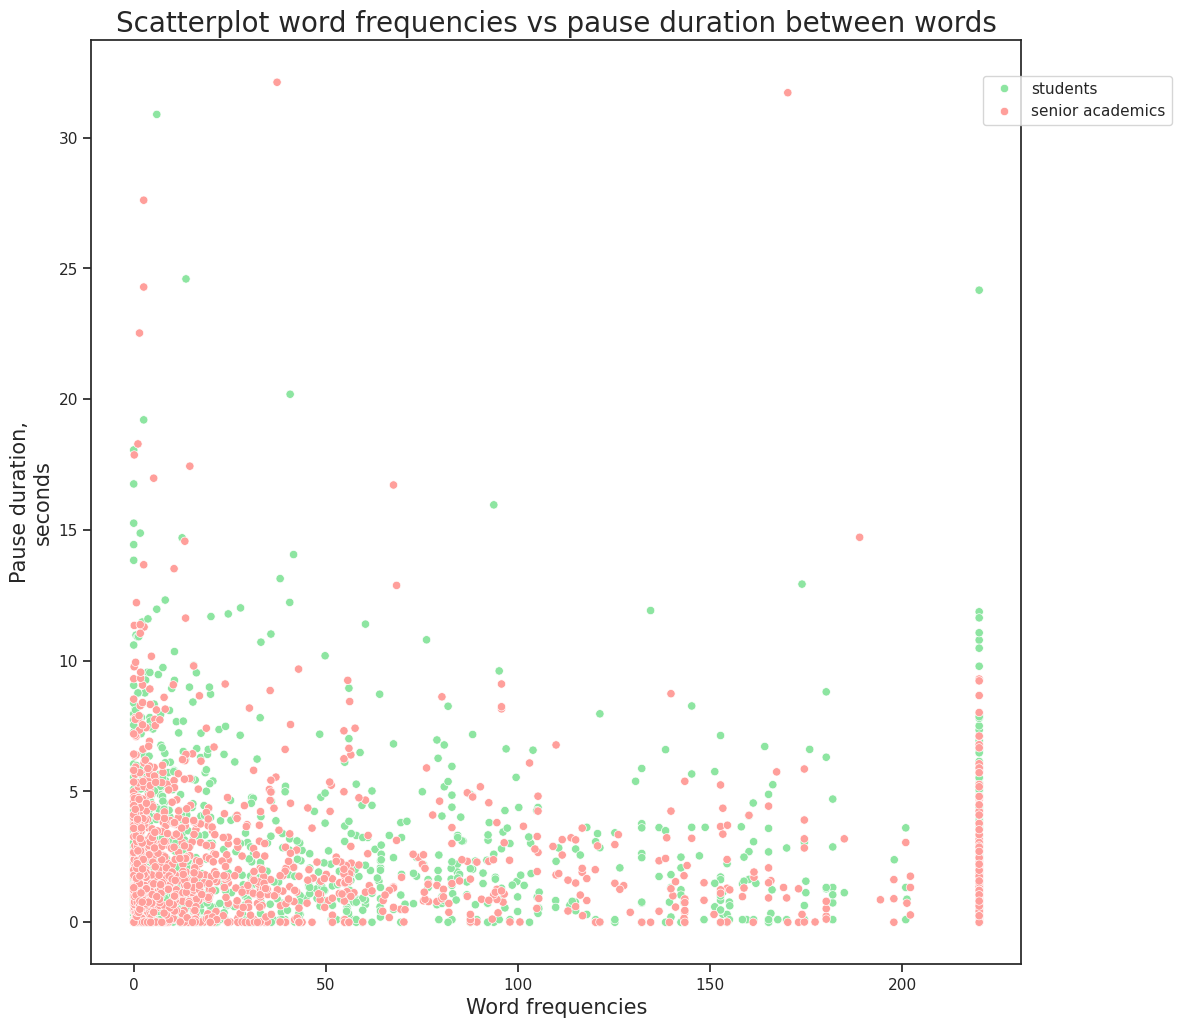

In [48]:
plt.figure(figsize=(12, 12))

g = sns.scatterplot(data = df, x='Частотность',y='Пауза', hue='type', palette={'senior academics':'r', 'students':'g'})
g.legend( bbox_to_anchor=(0.95, 0.97))
#modify axis labels
plt.xlabel('Word frequencies', fontsize = 15)
plt.ylabel('Pause duration,\nseconds', fontsize = 15)
plt.title("Scatterplot word frequencies vs pause duration between words", fontsize = 20)

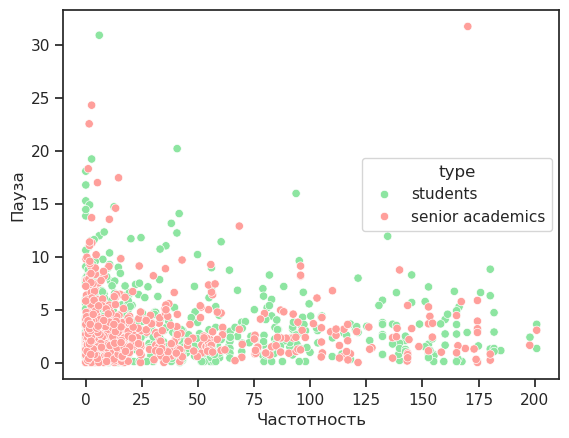

In [49]:
sns.scatterplot(data = others, x='Частотность',y='Пауза', hue='type',  palette={'senior academics':'r', 'students':'g'});

Вообще можно заметить тенденцию, что студенты чаще могут пользоваться какими-то другими стратегиями, в общем-то все

Посмотрим, что с паузой и стратегией

In [50]:
df_sub = df.loc[:, 'Пауза']


# OPTION 1: z-score filter: z-score < 3
#lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

# OPTION 2: quantile filter: discard 1% upper / lower values
#lim = np.logical_and(df_sub < df_sub.quantile(0.99, numeric_only=False),
#                     df_sub > df_sub.quantile(0.01, numeric_only=False))

# OPTION 3: iqr filter: within 2.22 IQR (equiv. to z-score < 3)
iqr = df_sub.quantile(0.75) - df_sub.quantile(0.25)
lim = np.abs((df_sub - df_sub.median()) / iqr) < 2.22


# replace outliers with nan
df.loc[:, 'Пауза'] = df_sub.where(lim, np.nan)

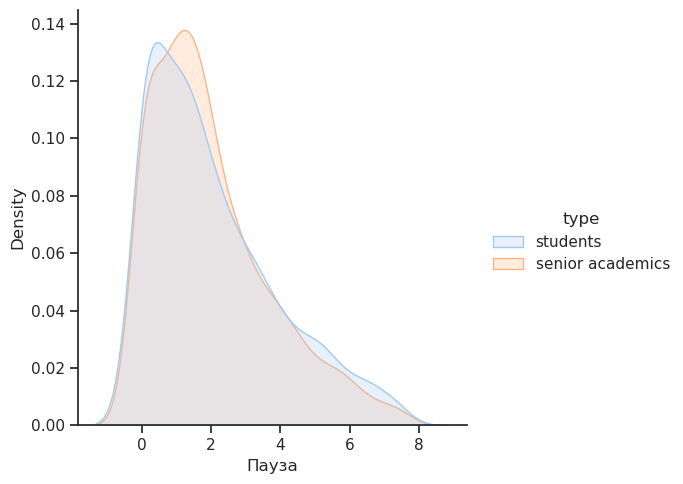

In [51]:
sns.displot(data = df, x='Пауза', hue='type', kind="kde", fill = True)

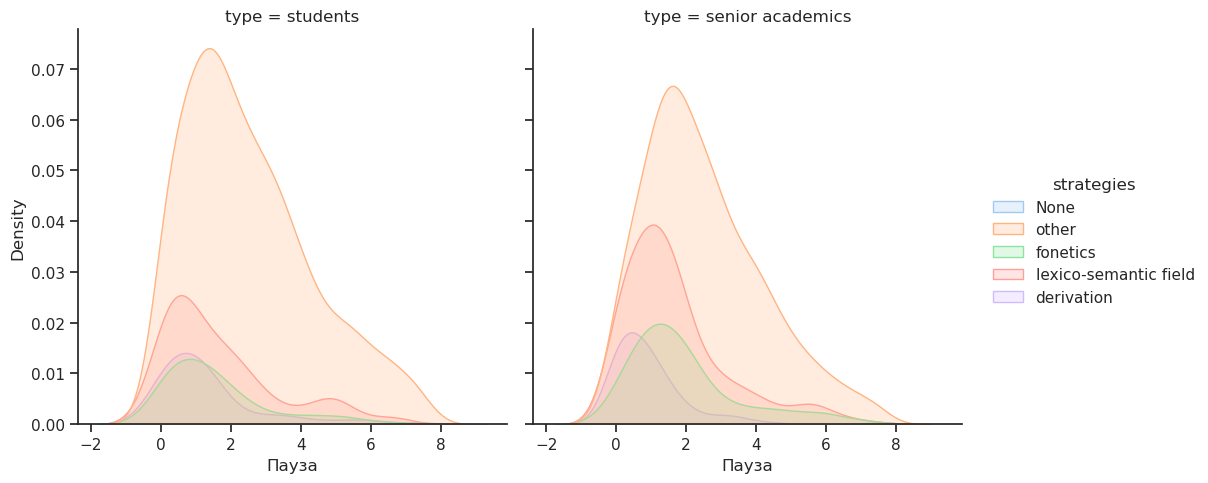

In [52]:
sns.displot(data = df, x='Пауза', hue='strategies', kind="kde", fill = True, warn_singular=False, col = 'type');

In [53]:
dfj.head()

,index,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
1,1,Б_В_10,1,период,"[пара, период]",п,8,2,2,220.0,0.10,0,0,59,28,13,18,"2,390357143",students,other
2,2,Б_В_10,1,парад,"[период, парад]",п,1,3,3,13.2,3.15,1.0,0,59,28,13,18,"2,390357143",students,fonetics
3,3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,0,59,28,13,18,"2,390357143",students,other
4,4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,220.0,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field
5,5,Б_В_10,1,повреждение,"[по, повреждение]",п,8,6,6,18.5,3.34,1.0,0,59,28,13,18,"2,390357143",students,other


In [54]:
dfj[dfj['strategies']=='lexico-semantic field'].groupby('type')['Пауза'].apply(list)

type
senior academics    [2.01, 1.78, 1.52, 1.91, 3.64, 1.51, 2.01, 0.8...
students            [0.7, 0.1, 0.33, 2.65, 10.91, 0.55, 1.82, 1.89...
Name: Пауза, dtype: object

In [55]:
from scipy.stats import mannwhitneyu

U1, p1 = mannwhitneyu(*dfj[dfj['strategies']=='other'].groupby('type')['Пауза'].apply(list))
U2, p2 = mannwhitneyu(*dfj[dfj['strategies']=='fonetics'].groupby('type')['Пауза'].apply(list))
U3, p3 = mannwhitneyu(*dfj[dfj['strategies']=='lexico-semantic field'].groupby('type')['Пауза'].apply(list))

U4, p4 = mannwhitneyu(*dfj[dfj['strategies']=='derivation'].groupby('type')['Пауза'].apply(list))

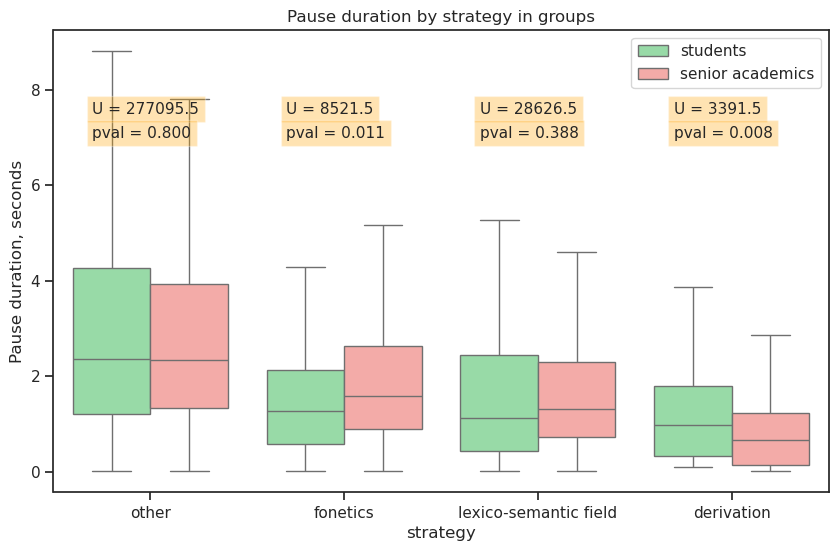

In [56]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks", palette="pastel")
g = sns.boxplot(data = dfj, x='strategies',y='Пауза', hue='type', palette={'senior academics':'r', 'students':'g'}, showfliers = False);
plt.xlabel('strategy')
plt.ylabel('Pause duration, seconds')
plt.title(f'Pause duration by strategy in groups')



plt.text(-0.3, 7.5, f"U = {U1:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(-0.3, 7, f"pval = {p1:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(0.7, 7.5, f"U = {U2:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(0.7, 7, f"pval = {p2:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(1.7, 7.5, f"U = {U3:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(1.7, 7, f"pval = {p3:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(2.7, 7.5, f"U = {U4:.1f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)
plt.text(2.7, 7, f"pval = {p4:.3f}", rotation = 0, fontsize = 11, bbox = dict(facecolor = 'orange', alpha = 0.3))         # Size
      # Style)       
g.legend( bbox_to_anchor=(1, 1))

/tmp/ipykernel_28734/495669600.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = df[df['strategies']!='other'], x='Пауза', hue='strategies', kind="kde", fill = True, col = 'type');


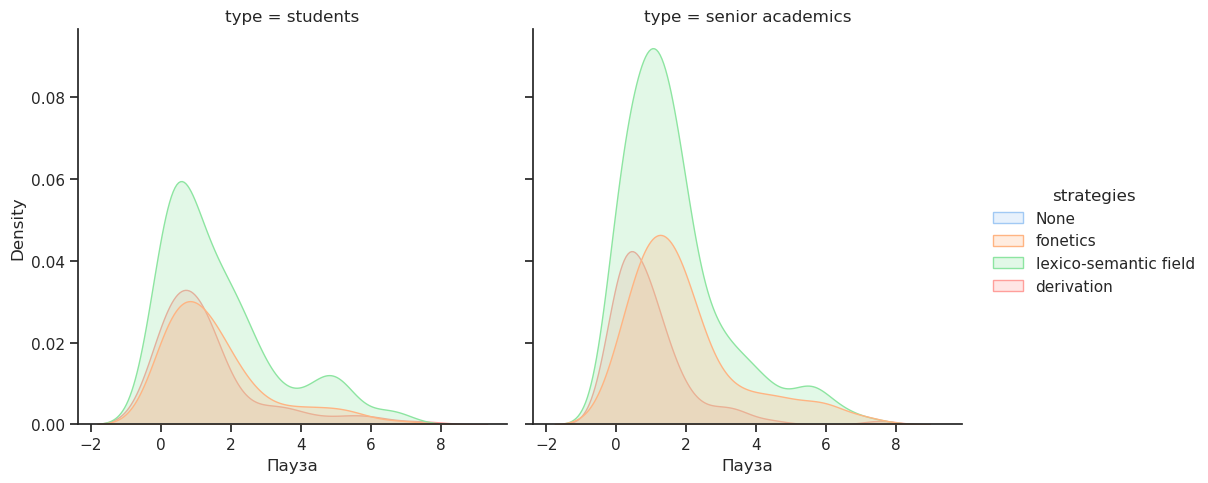

In [57]:
sns.displot(data = df[df['strategies']!='other'], x='Пауза', hue='strategies', kind="kde", fill = True, col = 'type');

In [58]:
students.shape

(1295, 18)

In [59]:
dolgolets.shape

(1273, 18)

<Axes: xlabel='strategies', ylabel='Частотность'>

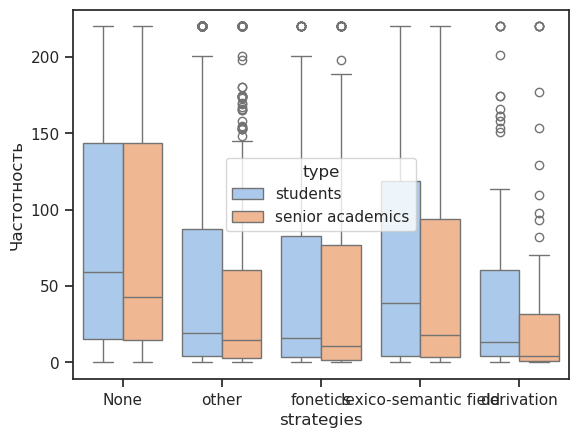

In [60]:
sns.boxplot(data=df, x="strategies", y="Частотность", hue="type")

<Axes: xlabel='strategies', ylabel='Частотность'>

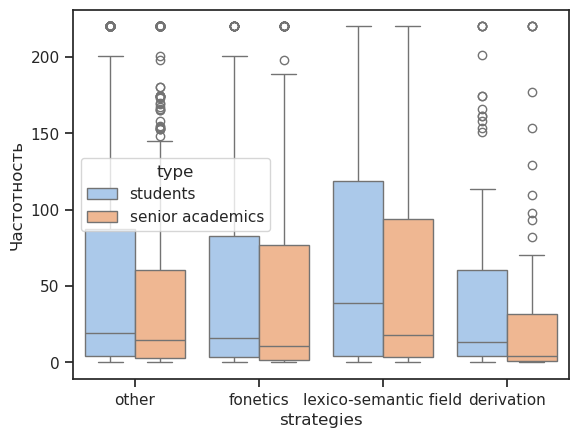

In [61]:
#!!!!!! лексико семантика по типам - часттотность, анова манова сделать
sns.boxplot(data=df[df['strategies']!='None'], x="strategies", y="Частотность", hue="type")

<Axes: xlabel='strategies', ylabel='Пауза'>

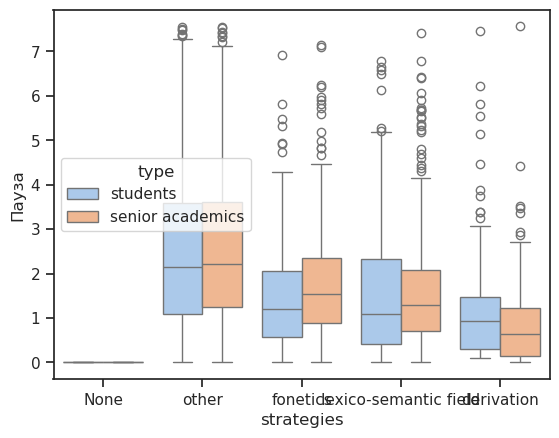

In [62]:
sns.boxplot(data=df, x="strategies", y="Пауза", hue="type")

<Axes: xlabel='strategies', ylabel='Пауза'>

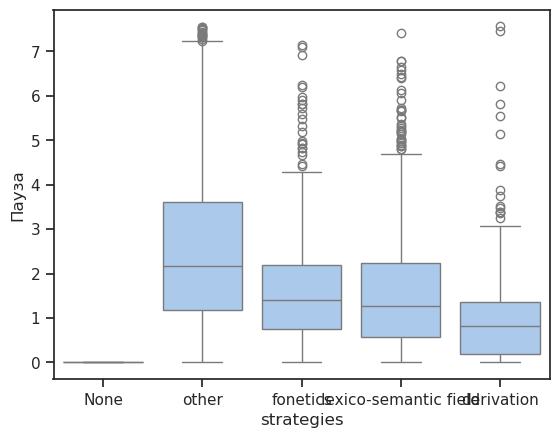

In [63]:
sns.boxplot(data=df, x="strategies", y="Пауза")

1)  стратегий больше меньше  каких у кого

2) паузация частотность

3) кластеризация 

Выводы: 
стат значимости доделать! 

## Статистические тесты. 

# Протяженность стратегий

In [64]:
df.shape

(2568, 20)

In [65]:
df.head()

,index,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type,strategies
0,0,Б_В_10,1,пара,0,п,n,1,1,152.7,0.00,0,0,59,28,13,18,"2,390357143",students,None
1,1,Б_В_10,1,период,"[пара, период]",п,8,2,2,220.0,0.10,0,0,59,28,13,18,"2,390357143",students,other
2,2,Б_В_10,1,парад,"[период, парад]",п,1,3,3,13.2,3.15,1.0,0,59,28,13,18,"2,390357143",students,fonetics
3,3,Б_В_10,1,предлог,"[парад, предлог]",п,8,4,4,12.7,1.00,1.0,0,59,28,13,18,"2,390357143",students,other
4,4,Б_В_10,1,по,"[предлог, по]",п,3,5,5,220.0,0.70,0,0,59,28,13,18,"2,390357143",students,lexico-semantic field


In [66]:
df['"derivation" strategy mean duration'] = 0
df['"fonetics" strategy mean duration'] = 0
df['"lexico-semantic field" strategy mean duration'] = 0
df['"other" strategy mean duration'] = 0

## strats 

In [67]:
(df['ID'].unique())[1]

'Б_В_24'

In [68]:
import pandas as pd
import numpy as np
#strats example for one person
def mean_strat(df, id, let='п', metric_name='mean'):
    strats_example = df.loc[(df['ID']==id) & (df['Первая_буква']==let), 'strategies'].values
    strats_list = []
    count = 1
    
    print("strats_example")
    print(strats_example)
    
    for i in range(1, len(strats_example)):
        if strats_example[i] == strats_example[i-1]:
            count += 1
        else:
            strats_list.append((strats_example[i-1], count))
            count = 1
    
    # Add the last strategy
    strats_list.append((strats_example[-1], count))
    
    print("\nstrats_list")
    print(strats_list)
    
    print("\nstrats_forone")
    print(pd.DataFrame(strats_list).to_string())
    
    strats_forone = pd.DataFrame(strats_list)
    strats_forone.columns = ['strategy', 'strategy duration']
    strats_forone.replace(0, np.nan, inplace=True)
    strats_forone.replace(1, np.nan, inplace=True)
    print(list(strats_forone['strategy']))

    # Dictionary of columns to calculate mean for
    columns_to_mean = {
        'derivation',
        'other',
        'lexico-semantic field',
        'fonetics'
    }

    # Initialize empty Series for each column
    metric = {}
    # for col_name in columns_to_mean:
    #     means[col_name] = 
        
        
    #     pd.Series(index=strats_forone['strategy'], name=col_name)

    for col_name in columns_to_mean:
        if col_name in list(strats_forone['strategy']):
            metric[col_name] = (strats_forone.groupby('strategy').agg(metric_name)).loc[col_name]
        else:
            metric[col_name] = [0]   
    print(metric)         

    # Calculate mean for each strategy
    # for col_name, display_name in columns_to_mean.items():
    #     if col_name in strats_forone.columns:
    #         means[col_name] = strats_forone.groupby('strategy')[col_name].mean()

    return metric


example = mean_strat(df,id='Б_В_24', let='п')
example

strats_example
['None' 'other' 'lexico-semantic field' 'other' 'lexico-semantic field'
 'fonetics' 'fonetics' 'other' 'other' 'other']

strats_list
[('None', 1), ('other', 1), ('lexico-semantic field', 1), ('other', 1), ('lexico-semantic field', 1), ('fonetics', 2), ('other', 3)]

strats_forone
                       0  1
0                   None  1
1                  other  1
2  lexico-semantic field  1
3                  other  1
4  lexico-semantic field  1
5               fonetics  2
6                  other  3
['None', 'other', 'lexico-semantic field', 'other', 'lexico-semantic field', 'fonetics', 'other']
{'derivation': [0], 'other': strategy duration    3.0
Name: other, dtype: float64, 'fonetics': strategy duration    2.0
Name: fonetics, dtype: float64, 'lexico-semantic field': strategy duration   NaN
Name: lexico-semantic field, dtype: float64}


{'derivation': [0],
 'other': strategy duration    3.0
 Name: other, dtype: float64,
 'fonetics': strategy duration    2.0
 Name: fonetics, dtype: float64,
 'lexico-semantic field': strategy duration   NaN
 Name: lexico-semantic field, dtype: float64}

## Main loop, letter 'п', 'mean'

In [69]:
#Main loop
deriv = pd.DataFrame(columns=['fonetics','lexico-semantic field', 'derivation', 'other'])

for idt in df['ID'].unique():
    print(idt)
    tmeans = mean_strat(df,id=idt, let='п', metric_name='mean')
    #data = {'Name': ['John'], 'Age': [25], 'Country': ['USA']}

    print('tmeans')
    print(tmeans)
    tmeans_ser = pd.DataFrame([[   list(tmeans['fonetics'])[0],
                            list(tmeans['lexico-semantic field'])[0], 
                            list(tmeans['derivation'])[0], 
                            list(tmeans['other'])[0]   ]], columns=['fonetics','lexico-semantic field', 'derivation', 'other'],\
                            index=[idt])
    deriv = pd.concat([deriv,tmeans_ser])

Б_В_10
strats_example
['None' 'other' 'fonetics' 'other' 'lexico-semantic field' 'other' 'other'
 'derivation' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'derivation' 'derivation' 'derivation' 'derivation'
 'derivation' 'other' 'other' 'other' 'derivation' 'other' 'other']

strats_list
[('None', 1), ('other', 1), ('fonetics', 1), ('other', 1), ('lexico-semantic field', 1), ('other', 2), ('derivation', 1), ('other', 9), ('derivation', 5), ('other', 3), ('derivation', 1), ('other', 2)]

strats_forone
                        0  1
0                    None  1
1                   other  1
2                fonetics  1
3                   other  1
4   lexico-semantic field  1
5                   other  2
6              derivation  1
7                   other  9
8              derivation  5
9                   other  3
10             derivation  1
11                  other  2
['None', 'other', 'fonetics', 'other', 'lexico-semantic field', 'other', 'derivation', 'o

/tmp/ipykernel_28734/3951627660.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  deriv = pd.concat([deriv,tmeans_ser])


pr_K_3
strats_example
['None' 'other' 'other' 'lexico-semantic field' 'lexico-semantic field'
 'other' 'other']

strats_list
[('None', 1), ('other', 2), ('lexico-semantic field', 2), ('other', 2)]

strats_forone
                       0  1
0                   None  1
1                  other  2
2  lexico-semantic field  2
3                  other  2
['None', 'other', 'lexico-semantic field', 'other']
{'derivation': [0], 'other': strategy duration    2.0
Name: other, dtype: float64, 'fonetics': [0], 'lexico-semantic field': strategy duration    2.0
Name: lexico-semantic field, dtype: float64}
tmeans
{'derivation': [0], 'other': strategy duration    2.0
Name: other, dtype: float64, 'fonetics': [0], 'lexico-semantic field': strategy duration    2.0
Name: lexico-semantic field, dtype: float64}
pr_L_1
strats_example
['None' 'other' 'fonetics' 'lexico-semantic field' 'other' 'other'
 'fonetics' 'fonetics' 'fonetics' 'fonetics']

strats_list
[('None', 1), ('other', 1), ('fonetics', 1), ('lexi

In [70]:
#df.index = df['ID']
deriv['ID'] = deriv.index 

In [71]:
metric_derivb = deriv.merge(df[['ID','type']], on='ID', how='left')

# df['"derivation" strategy mean duration'] = df['derivation']
# df['"fonetics" strategy mean duration'] = df['fonetics']
# df['"lexico-semantic field" strategy mean duration'] = df['']

In [72]:
metric_derivb = metric_derivb.drop_duplicates(keep='first')
metric_derivb.index = metric_derivb['ID']
metric_derivb = metric_derivb.drop(columns = ['ID'])

In [73]:
# df['"derivation" strategy mean duration'] = mean_deriv['derivation']
# df['"fonetics" strategy mean duration'] = mean_deriv['fonetics']
# df['"lexico-semantic field" strategy mean duration'] = mean_deriv['lexico-semantic field']
# df['"other" strategy mean duration'] = mean_deriv['other']
# # df[['ID','"lexico-semantic field" strategy mean duration','"fonetics" strategy mean duration',
# #    '"derivation" strategy mean duration', '"other" strategy mean duration', 'type']]

In [74]:
metric_derivb['ID'] = metric_derivb.index

In [75]:
deriv.columns

Index(['fonetics', 'lexico-semantic field', 'derivation', 'other', 'ID'], dtype='object')

In [76]:
#mean_derivb = mean_derivb.fillna(0)

Text(0.5, 1.0, 'Letter "п", strategy mean duration between groups')

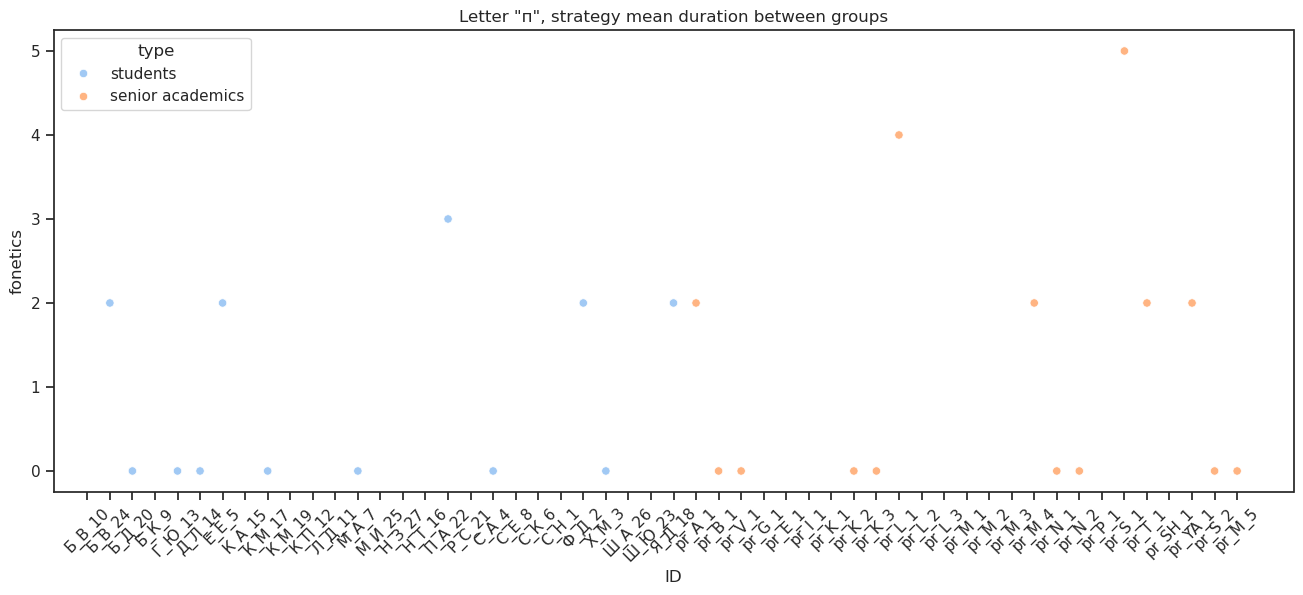

In [77]:
plt.figure(figsize=(16, 6))
ax = sns.set_theme(style="ticks", palette="pastel")
#plt.tick_params
plt.tick_params(axis='x', rotation=45)
# plt.ylim(0,17)
# sns.lineplot(mean_deriv[['derivation', 'type_x']], hue='type_x')
sns.scatterplot(data=metric_derivb, x='ID', y='fonetics', hue="type")
plt.title('Letter "п", strategy mean duration between groups')

In [78]:
#mean_derivb = mean_derivb.replace(0, np.nan, inplace=True)

In [79]:
metric_derivb

,fonetics,lexico-semantic field,derivation,other,type,ID
ID,,,,,,
Б_В_10,NaN,NaN,5.0,4.000000,students,Б_В_10
Б_В_24,2.0,NaN,0.0,3.000000,students,Б_В_24
Б_Д_20,0.0,NaN,NaN,3.666667,students,Б_Д_20
Б_К_9,NaN,NaN,NaN,3.000000,students,Б_К_9
Г_Ю_13,0.0,NaN,0.0,4.333333,students,Г_Ю_13
Д_Л_14,0.0,2.000000,NaN,4.333333,students,Д_Л_14
Е_Е_5,2.0,NaN,0.0,4.000000,students,Е_Е_5
К_А_15,NaN,NaN,2.0,3.000000,students,К_А_15
К_М_17,0.0,NaN,NaN,8.000000,students,К_М_17


In [80]:
fon = metric_derivb[['fonetics','type']].dropna()
fon

,fonetics,type
ID,,
Б_В_24,2.0,students
Б_Д_20,0.0,students
Г_Ю_13,0.0,students
Д_Л_14,0.0,students
Е_Е_5,2.0,students
К_М_17,0.0,students
М_А_7,0.0,students
П_А_22,3.0,students
С_А_4,0.0,students


In [81]:
fon['fonetics'] = fon['fonetics'].astype(float)

Text(0.5, 1.0, 'Letter "п", strategy mean duration between groups')

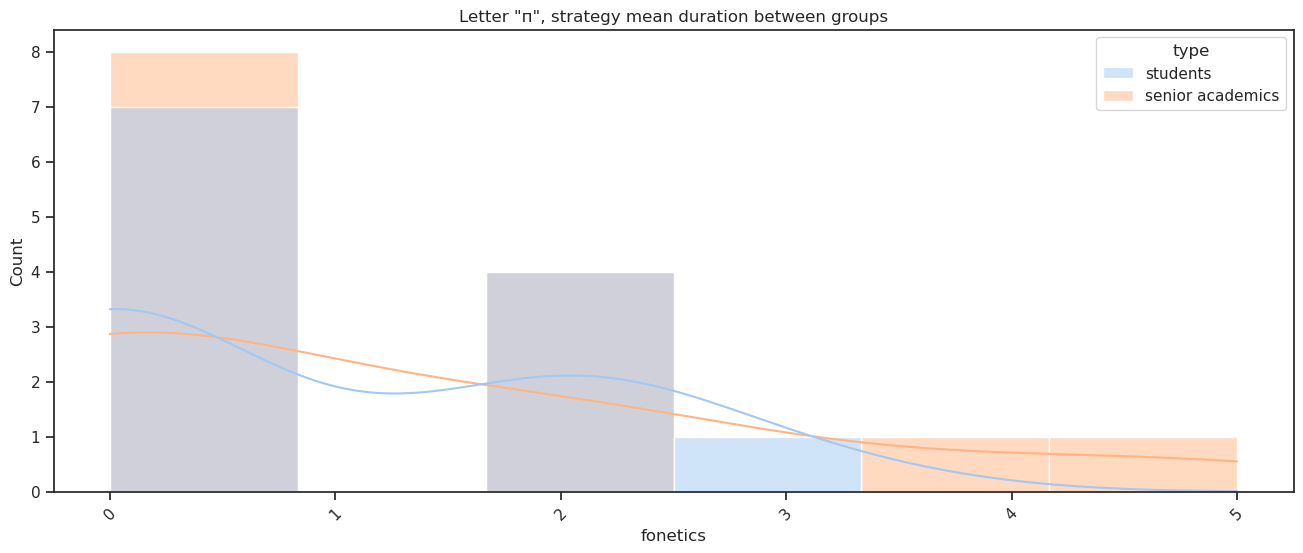

In [82]:
plt.figure(figsize=(16, 6))
ax = sns.set_theme(style="ticks", palette="pastel")
#plt.tick_params
plt.tick_params(axis='x', rotation=45)
# plt.ylim(0,17)
# sns.lineplot(mean_deriv[['derivation', 'type_x']], hue='type_x')

sns.histplot(data=fon, x = 'fonetics',hue='type', kde = True)

plt.title('Letter "п", strategy mean duration between groups')

Text(0.5, 1.0, 'Letter "п", strategy mean duration between groups')

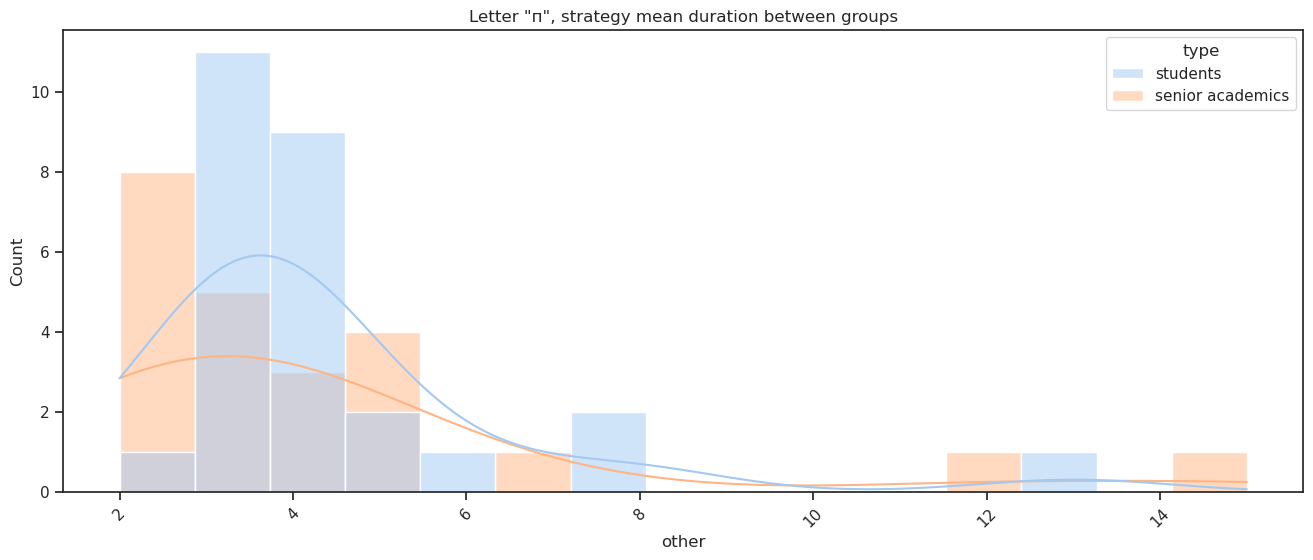

In [83]:
col = 'other'
fon = metric_derivb[[col,'type']].dropna()
fon[col] = fon[col].astype(float)
plt.figure(figsize=(16, 6))
ax = sns.set_theme(style="ticks", palette="pastel")
#plt.tick_params
plt.tick_params(axis='x', rotation=45)
# plt.ylim(0,17)
# sns.lineplot(mean_deriv[['derivation', 'type_x']], hue='type_x')
sns.histplot(data=fon, x = col,hue='type', kde = True)
plt.title('Letter "п", strategy mean duration between groups')

Text(0.5, 1.0, 'Letter "п", strategy mean duration between groups')

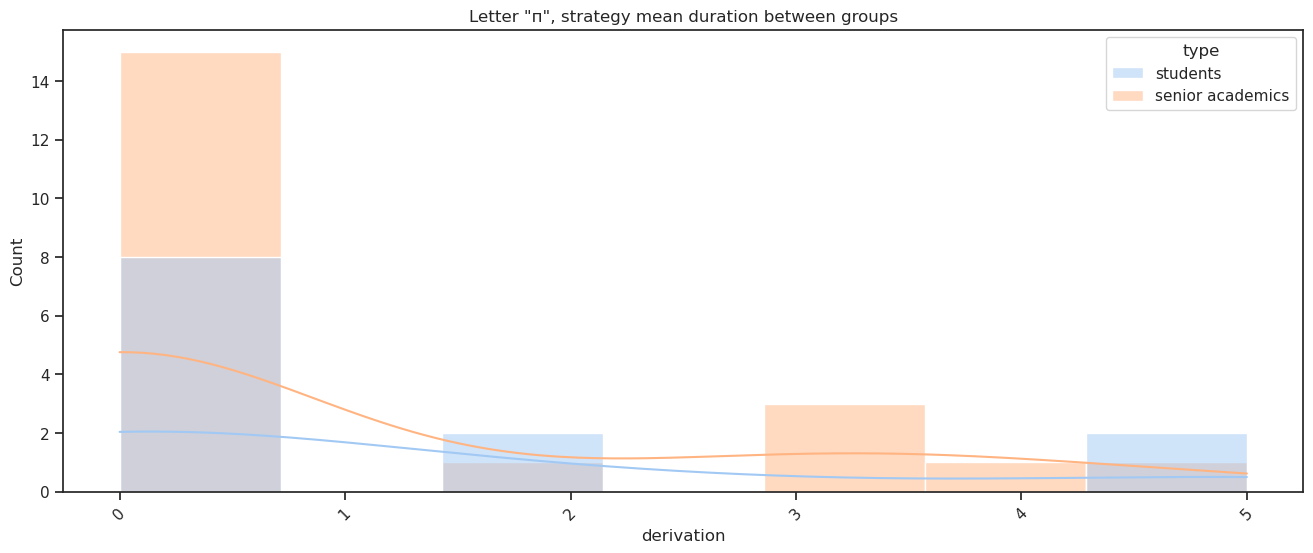

In [84]:
col = 'derivation'
fon = metric_derivb[[col,'type']].dropna()
fon[col] = fon[col].astype(float)
plt.figure(figsize=(16, 6))
ax = sns.set_theme(style="ticks", palette="pastel")
#plt.tick_params
plt.tick_params(axis='x', rotation=45)
# plt.ylim(0,17)
# sns.lineplot(mean_deriv[['derivation', 'type_x']], hue='type_x')
sns.histplot(data=fon, x = col,hue='type', kde = True)
plt.title('Letter "п", strategy mean duration between groups')

Text(0.5, 1.0, 'Letter "п", strategy mean duration between groups')

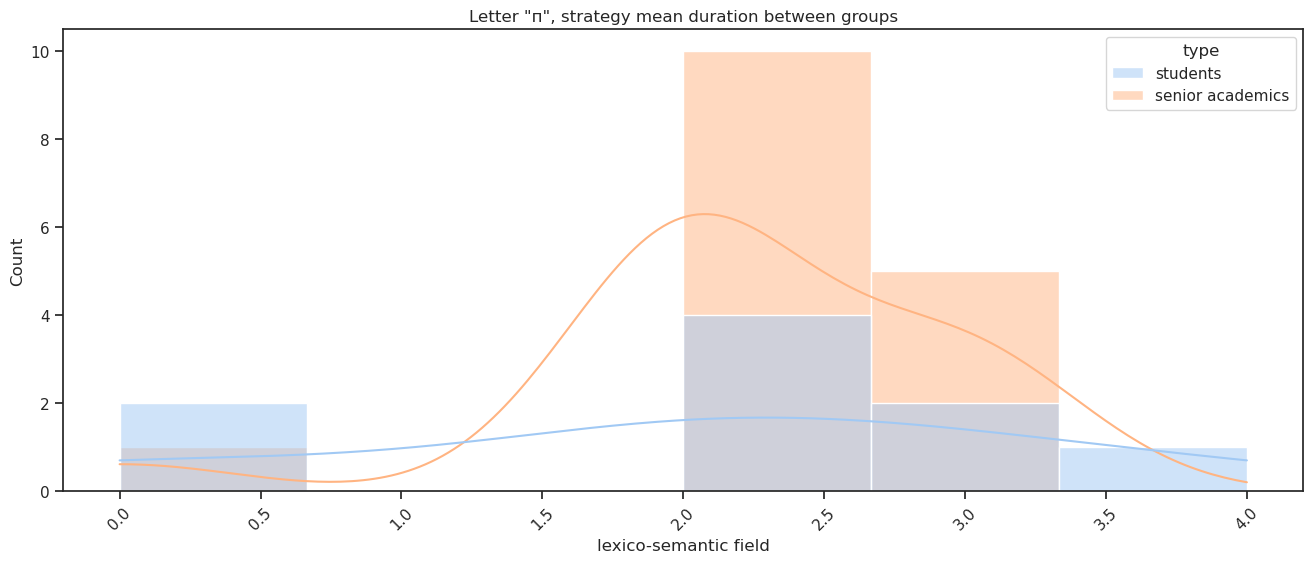

In [85]:
col = 'lexico-semantic field'
fon = metric_derivb[[col,'type']].dropna()
fon[col] = fon[col].astype(float)
plt.figure(figsize=(16, 6))
ax = sns.set_theme(style="ticks", palette="pastel")
#plt.tick_params
plt.tick_params(axis='x', rotation=45)
# plt.ylim(0,17)
# sns.lineplot(mean_deriv[['derivation', 'type_x']], hue='type_x')
sns.histplot(data=fon, x = col,hue='type', kde = True)
plt.title('Letter "п", strategy mean duration between groups')

In [86]:
col

'lexico-semantic field'

In [87]:
students_duration =list(fon[fon['type']=='students']['lexico-semantic field'])
academics_duration = list(fon[fon['type']=='senior academics']['lexico-semantic field'])

In [88]:
mannwhitneyu(students_duration, academics_duration)

MannwhitneyuResult(statistic=66.0, pvalue=0.7335830147498811)

<Axes: xlabel='other', ylabel='Count'>

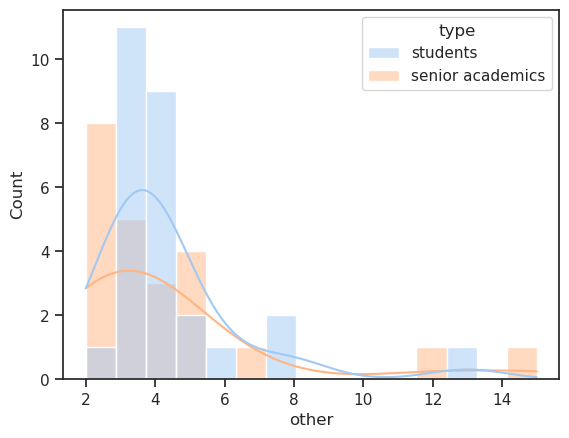

In [89]:
sns.histplot(data=metric_derivb,x='other', hue="type", kde = True)

<Axes: xlabel='derivation', ylabel='Count'>

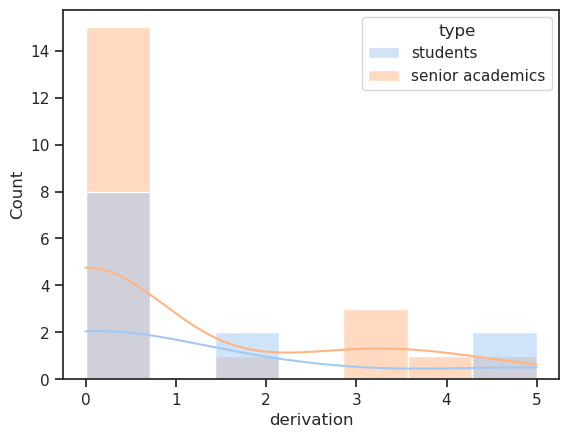

In [90]:
sns.histplot(data=metric_derivb,x='derivation', hue="type", kde = True)

In [91]:
list[2]

list[2]

## other letters, mean

In [92]:
max_strat_duration_p = metric_derivb.copy()
#mean_deriv_let_p

### letter "o"

In [93]:
deriv = pd.DataFrame(columns=['fonetics','lexico-semantic field', 'derivation', 'other'])

for idt in df['ID'].unique():
    print(idt)
    tmeans = mean_strat(df,id=idt, let='о', metric_name='mean')
    #data = {'Name': ['John'], 'Age': [25], 'Country': ['USA']}

    print('tmeans')
    print(tmeans)
    tmeans_ser = pd.DataFrame([[   list(tmeans['fonetics'])[0],
                            list(tmeans['lexico-semantic field'])[0], 
                            list(tmeans['derivation'])[0], 
                            list(tmeans['other'])[0]   ]], columns=['fonetics','lexico-semantic field', 'derivation', 'other'],\
                            index=[idt])
    deriv = pd.concat([deriv,tmeans_ser])

deriv['ID'] = deriv.index 
metric_derivb = deriv.merge(df[['ID','type']], on='ID', how='left')

metric_derivb = metric_derivb.drop_duplicates(keep='first')
metric_derivb.index = metric_derivb['ID']
metric_derivb = metric_derivb.drop(columns = ['ID'])
metric_derivb['ID'] = metric_derivb.index
max_strat_duration_o = metric_derivb.copy()

Б_В_10
strats_example
['None' 'lexico-semantic field' 'lexico-semantic field' 'other' 'other'
 'other' 'fonetics' 'fonetics' 'lexico-semantic field' 'fonetics' 'other'
 'other' 'lexico-semantic field']

strats_list
[('None', 1), ('lexico-semantic field', 2), ('other', 3), ('fonetics', 2), ('lexico-semantic field', 1), ('fonetics', 1), ('other', 2), ('lexico-semantic field', 1)]

strats_forone
                       0  1
0                   None  1
1  lexico-semantic field  2
2                  other  3
3               fonetics  2
4  lexico-semantic field  1
5               fonetics  1
6                  other  2
7  lexico-semantic field  1
['None', 'lexico-semantic field', 'other', 'fonetics', 'lexico-semantic field', 'fonetics', 'other', 'lexico-semantic field']
{'derivation': [0], 'other': strategy duration    2.5
Name: other, dtype: float64, 'fonetics': strategy duration    2.0
Name: fonetics, dtype: float64, 'lexico-semantic field': strategy duration    2.0
Name: lexico-semantic fi

/tmp/ipykernel_28734/2874039525.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  deriv = pd.concat([deriv,tmeans_ser])


{'derivation': [0], 'other': strategy duration    2.333333
Name: other, dtype: float64, 'fonetics': strategy duration   NaN
Name: fonetics, dtype: float64, 'lexico-semantic field': strategy duration    2.0
Name: lexico-semantic field, dtype: float64}
tmeans
{'derivation': [0], 'other': strategy duration    2.333333
Name: other, dtype: float64, 'fonetics': strategy duration   NaN
Name: fonetics, dtype: float64, 'lexico-semantic field': strategy duration    2.0
Name: lexico-semantic field, dtype: float64}
pr_L_3
strats_example
['None' 'other' 'other' 'fonetics' 'other' 'lexico-semantic field'
 'derivation' 'fonetics' 'fonetics' 'other' 'other' 'other']

strats_list
[('None', 1), ('other', 2), ('fonetics', 1), ('other', 1), ('lexico-semantic field', 1), ('derivation', 1), ('fonetics', 2), ('other', 3)]

strats_forone
                       0  1
0                   None  1
1                  other  2
2               fonetics  1
3                  other  1
4  lexico-semantic field  1
5     

### letter "c"

In [94]:
deriv = pd.DataFrame(columns=['fonetics','lexico-semantic field', 'derivation', 'other'])

for idt in df['ID'].unique():
    print(idt)
    tmeans = mean_strat(df,id=idt, let='с', metric_name='mean')
    #data = {'Name': ['John'], 'Age': [25], 'Country': ['USA']}

    print('tmeans')
    print(tmeans)
    tmeans_ser = pd.DataFrame([[   list(tmeans['fonetics'])[0],
                            list(tmeans['lexico-semantic field'])[0], 
                            list(tmeans['derivation'])[0], 
                            list(tmeans['other'])[0]   ]], columns=['fonetics','lexico-semantic field', 'derivation', 'other'],\
                            index=[idt])
    deriv = pd.concat([deriv,tmeans_ser])

deriv['ID'] = deriv.index 
metric_derivb = deriv.merge(df[['ID','type']], on='ID', how='left')

metric_derivb = metric_derivb.drop_duplicates(keep='first')
metric_derivb.index = metric_derivb['ID']
metric_derivb = metric_derivb.drop(columns = ['ID'])
metric_derivb['ID'] = metric_derivb.index
max_strat_duration_c = metric_derivb.copy()

Б_В_10
strats_example
['None' 'derivation' 'lexico-semantic field' 'other'
 'lexico-semantic field' 'other' 'other' 'other' 'fonetics' 'fonetics'
 'other' 'other' 'other' 'other' 'other' 'other' 'other' 'other']

strats_list
[('None', 1), ('derivation', 1), ('lexico-semantic field', 1), ('other', 1), ('lexico-semantic field', 1), ('other', 3), ('fonetics', 2), ('other', 8)]

strats_forone
                       0  1
0                   None  1
1             derivation  1
2  lexico-semantic field  1
3                  other  1
4  lexico-semantic field  1
5                  other  3
6               fonetics  2
7                  other  8
['None', 'derivation', 'lexico-semantic field', 'other', 'lexico-semantic field', 'other', 'fonetics', 'other']
{'derivation': strategy duration   NaN
Name: derivation, dtype: float64, 'other': strategy duration    5.5
Name: other, dtype: float64, 'fonetics': strategy duration    2.0
Name: fonetics, dtype: float64, 'lexico-semantic field': strategy durat

/tmp/ipykernel_28734/2118287761.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  deriv = pd.concat([deriv,tmeans_ser])


pr_K_1
strats_example
['None' 'other' 'fonetics' 'other' 'lexico-semantic field' 'other' 'other'
 'lexico-semantic field' 'other' 'lexico-semantic field'
 'lexico-semantic field' 'lexico-semantic field' 'other'
 'lexico-semantic field' 'other']

strats_list
[('None', 1), ('other', 1), ('fonetics', 1), ('other', 1), ('lexico-semantic field', 1), ('other', 2), ('lexico-semantic field', 1), ('other', 1), ('lexico-semantic field', 3), ('other', 1), ('lexico-semantic field', 1), ('other', 1)]

strats_forone
                        0  1
0                    None  1
1                   other  1
2                fonetics  1
3                   other  1
4   lexico-semantic field  1
5                   other  2
6   lexico-semantic field  1
7                   other  1
8   lexico-semantic field  3
9                   other  1
10  lexico-semantic field  1
11                  other  1
['None', 'other', 'fonetics', 'other', 'lexico-semantic field', 'other', 'lexico-semantic field', 'other', 'lexico-

## anova between 'letter', 'group', 'strategy'

### data prepatartion

In [95]:
max_strat_duration_p = max_strat_duration_p.fillna(0)
max_strat_duration_c = max_strat_duration_c.fillna(0)
max_strat_duration_o = max_strat_duration_o.fillna(0)

/tmp/ipykernel_28734/1099998565.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  max_strat_duration_o = max_strat_duration_o.fillna(0)


In [96]:
mean_deriv_let_p_lexico = max_strat_duration_p[['lexico-semantic field','type']]
mean_deriv_let_p_deriv = max_strat_duration_p[['derivation', 'type']]
mean_deriv_let_p_other = max_strat_duration_p[['other', 'type']]
mean_deriv_let_p_fonetics = max_strat_duration_p[['fonetics', 'type']]



In [97]:
mean_deriv_let_p_melted = pd.melt(max_strat_duration_p.drop(columns='type'), id_vars=['ID'], var_name='group')
mean_deriv_let_p_melted['letter'] = 'п'
mean_deriv_let_p_melted.head()

,ID,group,value,letter
0,Б_В_10,fonetics,0.0,п
1,Б_В_24,fonetics,2.0,п
2,Б_Д_20,fonetics,0.0,п
3,Б_К_9,fonetics,0.0,п
4,Г_Ю_13,fonetics,0.0,п


In [98]:
mean_deriv_let_o_melted = pd.melt(max_strat_duration_o.drop(columns='type'), id_vars=['ID'], var_name='group')
mean_deriv_let_o_melted['letter'] = 'о'
mean_deriv_let_o_melted.head()

,ID,group,value,letter
0,Б_В_10,fonetics,2.0,о
1,Б_В_24,fonetics,0.0,о
2,Б_Д_20,fonetics,0.0,о
3,Б_К_9,fonetics,0.0,о
4,Г_Ю_13,fonetics,0.0,о


In [99]:
mean_deriv_let_c_melted = pd.melt(max_strat_duration_c.drop(columns='type'), id_vars=['ID'], var_name='group')
mean_deriv_let_c_melted['letter'] = 'с'
mean_deriv_let_c_melted.head()

,ID,group,value,letter
0,Б_В_10,fonetics,2.0,с
1,Б_В_24,fonetics,0.0,с
2,Б_Д_20,fonetics,0.0,с
3,Б_К_9,fonetics,0.0,с
4,Г_Ю_13,fonetics,0.0,с


In [100]:
mean_strats_duration = pd.concat([mean_deriv_let_p_melted, mean_deriv_let_o_melted, mean_deriv_let_c_melted])
mean_strats_duration

,ID,group,value,letter
0,Б_В_10,fonetics,0.000000,п
1,Б_В_24,fonetics,2.000000,п
2,Б_Д_20,fonetics,0.000000,п
3,Б_К_9,fonetics,0.000000,п
4,Г_Ю_13,fonetics,0.000000,п
...,...,...,...,...
203,pr_T_1,other,3.000000,с
204,pr_SH_1,other,3.000000,с
205,pr_YA_1,other,5.000000,с
206,pr_S_2,other,4.666667,с


In [101]:
sm_ids = max_strat_duration_p.drop(columns='ID')
mean_strats_duration_ = mean_strats_duration.merge(sm_ids[['type']], how='outer', left_on='ID', right_on='ID')

In [102]:
mean_strats_duration_.groupby(['group','letter','type'])['value'].apply(list)

group                  letter  type            
derivation             о       senior academics    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               students            [0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, ...
                       п       senior academics    [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               students            [5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, ...
                       с       senior academics    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               students            [0.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, ...
fonetics               о       senior academics    [4.0, 3.5, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               students            [2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, ...
                       п       senior academics    [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, ...
                               students    

In [103]:
mean_strats_duration_.groupby(['group','letter','type'])['value'].agg('count')

group                  letter  type            
derivation             о       senior academics    25
                               students            27
                       п       senior academics    25
                               students            27
                       с       senior academics    25
                               students            27
fonetics               о       senior academics    25
                               students            27
                       п       senior academics    25
                               students            27
                       с       senior academics    25
                               students            27
lexico-semantic field  о       senior academics    25
                               students            27
                       п       senior academics    25
                               students            27
                       с       senior academics    25
                               stu

In [104]:
f_oneway(*mean_strats_duration_.groupby(['group','letter','type'])['value'].apply(list))

F_onewayResult(statistic=21.45647703000018, pvalue=1.6259693690498953e-63)

In [105]:
# anova
tukey = stats.tukey_hsd(*mean_strats_duration_.groupby(['group','letter','type'])['value'].apply(list))
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.244     1.000    -1.888     1.399
 (0 - 2)     -0.620     1.000    -2.294     1.054
 (0 - 3)     -0.319     1.000    -1.962     1.325
 (0 - 4)     -0.053     1.000    -1.728     1.621
 (0 - 5)     -0.170     1.000    -1.813     1.473
 (0 - 6)     -1.240     0.512    -2.914     0.434
 (0 - 7)     -0.281     1.000    -1.925     1.362
 (0 - 8)     -0.480     1.000    -2.154     1.194
 (0 - 9)     -0.207     1.000    -1.851     1.436
 (0 - 10)     -0.467     1.000    -2.141     1.208
 (0 - 11)     -0.096     1.000    -1.739     1.547
 (0 - 12)     -1.240     0.512    -2.914     0.434
 (0 - 13)     -0.244     1.000    -1.888     1.399
 (0 - 14)     -1.213     0.559    -2.888     0.461
 (0 - 15)     -0.467     1.000    -2.110     1.176
 (0 - 16)     -1.527     0.132    -3.201     0.148
 (0 - 17)     -0.998     0.860    -2.641     0.646
 (0 - 18)     -3.485    

derivation о       senior academics    25 

other о       senior academics    25

                               students            27

                       п       senior academics    25

                               students            27

                       с       senior academics    25

                               students            27
                               

In [106]:
mean_strats_duration_.groupby(['group','type'])['value'].agg('mean')

group                  type            
derivation             senior academics    0.424444
                       students            0.444444
fonetics               senior academics    0.928889
                       students            0.395062
lexico-semantic field  senior academics    1.526667
                       students            0.769547
other                  senior academics    3.812889
                       students            4.029218
Name: value, dtype: float64

In [107]:
tukey = stats.tukey_hsd(*mean_strats_duration_.groupby(['group','type'])['value'].apply(list))
print(tukey)
# derivation             senior academics    0.424444 - lexico-semantic field  senior academics    1.526667
# derivation             senior academics    0.424444 - other                  senior academics    3.812889
# derivation students            0.444444 - other students            0.444444

# other!!!

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.020     1.000    -0.807     0.767
 (0 - 2)     -0.504     0.543    -1.307     0.298
 (0 - 3)      0.029     1.000    -0.758     0.817
 (0 - 4)     -1.102     0.001    -1.904    -0.300
 (0 - 5)     -0.345     0.886    -1.132     0.442
 (0 - 6)     -3.388     0.000    -4.191    -2.586
 (0 - 7)     -3.605     0.000    -4.392    -2.818
 (1 - 0)      0.020     1.000    -0.767     0.807
 (1 - 2)     -0.484     0.571    -1.272     0.303
 (1 - 3)      0.049     1.000    -0.723     0.821
 (1 - 4)     -1.082     0.001    -1.869    -0.295
 (1 - 5)     -0.325     0.906    -1.097     0.447
 (1 - 6)     -3.368     0.000    -4.156    -2.581
 (1 - 7)     -3.585     0.000    -4.357    -2.813
 (2 - 0)      0.504     0.543    -0.298     1.307
 (2 - 1)      0.484     0.571    -0.303     1.272
 (2 - 3)      0.534     0.441    -0.253     1.321
 (2 - 4)     -0.598     0.314   

In [108]:
tukey = stats.tukey_hsd(*mean_strats_duration_.groupby(['letter','type'])['value'].apply(list))
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.375     0.808    -0.478     1.228
 (0 - 2)     -0.037     1.000    -0.906     0.832
 (0 - 3)      0.196     0.986    -0.657     1.049
 (0 - 4)      0.091     1.000    -0.778     0.960
 (0 - 5)      0.274     0.941    -0.578     1.127
 (1 - 0)     -0.375     0.808    -1.228     0.478
 (1 - 2)     -0.412     0.739    -1.265     0.441
 (1 - 3)     -0.179     0.990    -1.015     0.657
 (1 - 4)     -0.284     0.933    -1.136     0.569
 (1 - 5)     -0.101     0.999    -0.937     0.736
 (2 - 0)      0.037     1.000    -0.832     0.906
 (2 - 1)      0.412     0.739    -0.441     1.265
 (2 - 3)      0.233     0.971    -0.620     1.086
 (2 - 4)      0.128     0.998    -0.741     0.997
 (2 - 5)      0.311     0.903    -0.541     1.164
 (3 - 0)     -0.196     0.986    -1.049     0.657
 (3 - 1)      0.179     0.990    -0.657     1.015
 (3 - 2)     -0.233     0.971   

In [109]:
mean_strats_duration_[mean_strats_duration_['group']=='fonetics']

,ID,group,value,letter,type
0,pr_A_1,fonetics,2.0,п,senior academics
4,pr_A_1,fonetics,4.0,о,senior academics
8,pr_A_1,fonetics,0.0,с,senior academics
12,pr_B_1,fonetics,0.0,п,senior academics
16,pr_B_1,fonetics,3.5,о,senior academics
...,...,...,...,...,...
604,Ш_Ю_23,fonetics,3.0,о,students
608,Ш_Ю_23,fonetics,0.0,с,students
612,Я_Д_18,fonetics,2.0,п,students
616,Я_Д_18,fonetics,0.0,о,students


In [110]:
mw = mannwhitneyu(*mean_strats_duration_[mean_strats_duration_['group']=='fonetics'].groupby(['type'])['value'].apply(list))
print(mw)

MannwhitneyuResult(statistic=3519.0, pvalue=0.0243238122832781)


In [111]:
mw = mannwhitneyu(*mean_strats_duration_[mean_strats_duration_['group']=='other'].groupby(['type'])['value'].apply(list))
print(mw)

MannwhitneyuResult(statistic=2512.5, pvalue=0.06161049880646814)


In [112]:
mw = mannwhitneyu(*mean_strats_duration_[mean_strats_duration_['group']=='lexico-semantic field'].groupby(['type'])['value'].apply(list))
print(mw)

MannwhitneyuResult(statistic=3860.0, pvalue=0.0011029619187627347)


In [113]:
mw = mannwhitneyu(*mean_strats_duration_[mean_strats_duration_['group']=='derivation'].groupby(['type'])['value'].apply(list))
print(mw)

MannwhitneyuResult(statistic=3007.5, pvalue=0.8675530398064093)


In [114]:
manova = MANOVA.from_formula('group + type ~ value ', data=mean_strats_duration_)
result = manova.mv_test()
print(result)

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF          F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 5.0000 618.0000 -69580614242874288.0000 1.0000
         Pillai's trace                1.0000 5.0000 618.0000 -69580614242874280.0000 1.0000
 Hotelling-Lawley trace -562949953421313.0000 5.0000 618.0000 -69580614242874280.0000 1.0000
    Roy's greatest root -562949953421313.0000 5.0000 618.0000 -69580614242874280.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

In [115]:
  
# Apply MANOVA with the renamed columns
manova = MANOVA.from_formula('group + letter ~ value', data=mean_strats_duration)
result = manova.mv_test()
print(result)

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF          F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 6.0000 617.0000 -66160023097323816.0000 1.0000
         Pillai's trace                1.0000 6.0000 617.0000 -66160023097323816.0000 1.0000
 Hotelling-Lawley trace -643371375338643.2500 6.0000 617.0000 -66160023097323816.0000 1.0000
    Roy's greatest root -643371375338643.2500 6.0000 617.0000 -66160023097323808.0000 1.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------

In [116]:
data_mean_strats = mean_strats_duration_.groupby(['group','type'])['value'].apply(list)

In [117]:
mean_strats_duration_.groupby(['group'])['value'].apply(list)

group
derivation               [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
fonetics                 [2.0, 4.0, 0.0, 0.0, 3.5, 0.0, 0.0, 2.0, 0.0, ...
lexico-semantic field    [2.0, 0.0, 2.5, 2.0, 4.0, 4.0, 2.0, 0.0, 3.0, ...
other                    [2.0, 2.0, 2.0, 5.0, 2.0, 3.0, 3.5, 4.0, 14.0,...
Name: value, dtype: object

In [118]:
print(sp.posthoc_dunn(list(mean_strats_duration_.groupby(['group'])['value'].apply(list)), p_adjust='holm')<0.05)

       1      2      3      4
1  False  False   True   True
2  False  False   True   True
3   True   True  False   True
4   True   True   True  False


In [119]:
kruskal(*mean_strats_duration_.groupby(['group','type'])['value'].apply(list))

KruskalResult(statistic=314.89720133417427, pvalue=3.973002699100485e-64)

In [120]:
p_values = sp.posthoc_dunn(list(data_mean_strats), p_adjust='holm')

print(p_values)

              1             2             3             4             5  \
1  1.000000e+00  1.000000e+00  6.802553e-01  1.000000e+00  3.819182e-04   
2  1.000000e+00  1.000000e+00  6.802553e-01  1.000000e+00  3.380038e-04   
3  6.802553e-01  6.802553e-01  1.000000e+00  6.487856e-01  2.133284e-01   
4  1.000000e+00  1.000000e+00  6.487856e-01  1.000000e+00  2.687352e-04   
5  3.819182e-04  3.380038e-04  2.133284e-01  2.687352e-04  1.000000e+00   
6  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  5.830558e-02   
7  2.154441e-22  4.643815e-23  3.903369e-15  2.462989e-23  8.425306e-08   
8  5.641333e-30  5.946407e-31  2.480146e-21  2.772091e-31  2.853647e-12   

              6             7             8  
1  1.000000e+00  2.154441e-22  5.641333e-30  
2  1.000000e+00  4.643815e-23  5.946407e-31  
3  1.000000e+00  3.903369e-15  2.480146e-21  
4  1.000000e+00  2.462989e-23  2.772091e-31  
5  5.830558e-02  8.425306e-08  2.853647e-12  
6  1.000000e+00  2.689933e-17  4.812488e-24  
7 

In [121]:
data_mean_strats
# derivation  students - (lexico-semantic field  senior academics,other  senior academics, students)
# 

group                  type            
derivation             senior academics    [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                       students            [5.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 2.0, ...
fonetics               senior academics    [2.0, 4.0, 0.0, 0.0, 3.5, 0.0, 0.0, 2.0, 0.0, ...
                       students            [0.0, 2.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
lexico-semantic field  senior academics    [2.0, 0.0, 2.5, 2.0, 4.0, 4.0, 2.0, 0.0, 3.0, ...
                       students            [0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, ...
other                  senior academics    [2.0, 2.0, 2.0, 5.0, 2.0, 3.0, 3.5, 4.0, 14.0,...
                       students            [4.0, 2.5, 5.5, 3.0, 4.0, 3.0, 3.6666666666666...
Name: value, dtype: object

In [122]:
print(p_values <0.05)  

       1      2      3      4      5      6      7      8
1  False  False  False  False   True  False   True   True
2  False  False  False  False   True  False   True   True
3  False  False  False  False  False  False   True   True
4  False  False  False  False   True  False   True   True
5   True   True  False   True  False  False   True   True
6  False  False  False  False  False  False   True   True
7   True   True   True   True   True   True  False  False
8   True   True   True   True   True   True  False  False


## max strategy duration

letter p

In [123]:
def get_table_duration_strat(letter, metric, df):
    deriv = pd.DataFrame(columns=['fonetics','lexico-semantic field', 'derivation', 'other'])

    for idt in df['ID'].unique():
        print(idt)
        tmeans = mean_strat(df,id=idt, let=letter, metric_name=metric)
        #data = {'Name': ['John'], 'Age': [25], 'Country': ['USA']}

        print('tmeans')
        print(tmeans)
        tmeans_ser = pd.DataFrame([[   list(tmeans['fonetics'])[0],
                                list(tmeans['lexico-semantic field'])[0], 
                                list(tmeans['derivation'])[0], 
                                list(tmeans['other'])[0]   ]], columns=['fonetics','lexico-semantic field', 'derivation', 'other'],\
                                index=[idt])
        deriv = pd.concat([deriv,tmeans_ser])

    deriv['ID'] = deriv.index 
    metric_derivb = deriv.merge(df[['ID','type']], on='ID', how='left')
    metric_derivb.index = metric_derivb['ID']
    metric_derivb = metric_derivb.drop(columns = ['ID'])
    metric_derivb['ID'] = metric_derivb.index
    metric_derivb.copy()
    return metric_derivb

In [124]:
max_strat_duration_p = get_table_duration_strat('п','max', df)
max_strat_duration_o = get_table_duration_strat('о','max', df)
max_strat_duration_c = get_table_duration_strat('с','max', df)

Б_В_10
strats_example
['None' 'other' 'fonetics' 'other' 'lexico-semantic field' 'other' 'other'
 'derivation' 'other' 'other' 'other' 'other' 'other' 'other' 'other'
 'other' 'other' 'derivation' 'derivation' 'derivation' 'derivation'
 'derivation' 'other' 'other' 'other' 'derivation' 'other' 'other']

strats_list
[('None', 1), ('other', 1), ('fonetics', 1), ('other', 1), ('lexico-semantic field', 1), ('other', 2), ('derivation', 1), ('other', 9), ('derivation', 5), ('other', 3), ('derivation', 1), ('other', 2)]

strats_forone
                        0  1
0                    None  1
1                   other  1
2                fonetics  1
3                   other  1
4   lexico-semantic field  1
5                   other  2
6              derivation  1
7                   other  9
8              derivation  5
9                   other  3
10             derivation  1
11                  other  2
['None', 'other', 'fonetics', 'other', 'lexico-semantic field', 'other', 'derivation', 'o

/tmp/ipykernel_28734/1028164902.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  deriv = pd.concat([deriv,tmeans_ser])


pr_L_3
strats_example
['None' 'derivation' 'other' 'other' 'other' 'other' 'other'
 'lexico-semantic field' 'other' 'other' 'other' 'derivation' 'other'
 'lexico-semantic field' 'lexico-semantic field' 'lexico-semantic field'
 'fonetics' 'lexico-semantic field' 'lexico-semantic field'
 'lexico-semantic field' 'other' 'lexico-semantic field' 'other']

strats_list
[('None', 1), ('derivation', 1), ('other', 5), ('lexico-semantic field', 1), ('other', 3), ('derivation', 1), ('other', 1), ('lexico-semantic field', 3), ('fonetics', 1), ('lexico-semantic field', 3), ('other', 1), ('lexico-semantic field', 1), ('other', 1)]

strats_forone
                        0  1
0                    None  1
1              derivation  1
2                   other  5
3   lexico-semantic field  1
4                   other  3
5              derivation  1
6                   other  1
7   lexico-semantic field  3
8                fonetics  1
9   lexico-semantic field  3
10                  other  1
11  lexico-se

/tmp/ipykernel_28734/1028164902.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  deriv = pd.concat([deriv,tmeans_ser])


pr_M_4
strats_example
['None' 'other' 'lexico-semantic field' 'other' 'fonetics' 'fonetics'
 'fonetics' 'fonetics' 'fonetics' 'fonetics' 'other' 'derivation' 'other'
 'other']

strats_list
[('None', 1), ('other', 1), ('lexico-semantic field', 1), ('other', 1), ('fonetics', 6), ('other', 1), ('derivation', 1), ('other', 2)]

strats_forone
                       0  1
0                   None  1
1                  other  1
2  lexico-semantic field  1
3                  other  1
4               fonetics  6
5                  other  1
6             derivation  1
7                  other  2
['None', 'other', 'lexico-semantic field', 'other', 'fonetics', 'other', 'derivation', 'other']
{'derivation': strategy duration   NaN
Name: derivation, dtype: float64, 'other': strategy duration    2.0
Name: other, dtype: float64, 'fonetics': strategy duration    6.0
Name: fonetics, dtype: float64, 'lexico-semantic field': strategy duration   NaN
Name: lexico-semantic field, dtype: float64}
tmeans
{'deri

/tmp/ipykernel_28734/1028164902.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  deriv = pd.concat([deriv,tmeans_ser])


{'derivation': [0], 'other': strategy duration    4.0
Name: other, dtype: float64, 'fonetics': [0], 'lexico-semantic field': strategy duration    4.0
Name: lexico-semantic field, dtype: float64}
tmeans
{'derivation': [0], 'other': strategy duration    4.0
Name: other, dtype: float64, 'fonetics': [0], 'lexico-semantic field': strategy duration    4.0
Name: lexico-semantic field, dtype: float64}
pr_L_3
strats_example
['None' 'lexico-semantic field' 'derivation' 'other' 'fonetics' 'other'
 'other' 'lexico-semantic field' 'lexico-semantic field'
 'lexico-semantic field' 'lexico-semantic field' 'other'
 'lexico-semantic field' 'lexico-semantic field' 'other' 'other'
 'fonetics' 'other' 'other' 'other']

strats_list
[('None', 1), ('lexico-semantic field', 1), ('derivation', 1), ('other', 1), ('fonetics', 1), ('other', 2), ('lexico-semantic field', 4), ('other', 1), ('lexico-semantic field', 2), ('other', 2), ('fonetics', 1), ('other', 3)]

strats_forone
                        0  1
0        

### anova

In [125]:
max_strat_duration_p = max_strat_duration_p.fillna(0)
max_strat_duration_c = max_strat_duration_c.fillna(0)
max_strat_duration_o = max_strat_duration_o.fillna(0)

mean_deriv_let_p_melted = pd.melt(max_strat_duration_p.drop(columns='type'), id_vars=['ID'], var_name='group')
mean_deriv_let_p_melted['letter'] = 'п'
mean_deriv_let_p_melted.head()

mean_deriv_let_o_melted = pd.melt(max_strat_duration_o.drop(columns='type'), id_vars=['ID'], var_name='group')
mean_deriv_let_o_melted['letter'] = 'о'
mean_deriv_let_o_melted.head()

mean_deriv_let_c_melted = pd.melt(max_strat_duration_c.drop(columns='type'), id_vars=['ID'], var_name='group')
mean_deriv_let_c_melted['letter'] = 'с'
mean_deriv_let_c_melted.head()

max_strats_duration = pd.concat([mean_deriv_let_p_melted, mean_deriv_let_o_melted, mean_deriv_let_c_melted])
max_strats_duration

/tmp/ipykernel_28734/167474204.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  max_strat_duration_o = max_strat_duration_o.fillna(0)


,ID,group,value,letter
0,Б_В_10,fonetics,0.0,п
1,Б_В_10,fonetics,0.0,п
2,Б_В_10,fonetics,0.0,п
3,Б_В_10,fonetics,0.0,п
4,Б_В_10,fonetics,0.0,п
...,...,...,...,...
10267,pr_M_5,other,8.0,с
10268,pr_M_5,other,8.0,с
10269,pr_M_5,other,8.0,с
10270,pr_M_5,other,8.0,с


In [126]:
sm_ids = max_strat_duration_p.drop(columns='ID')
max_strats_duration_ = max_strats_duration.merge(sm_ids[['type']], how='outer', left_on='ID', right_on='ID')

#### anova analysis

In [127]:
tukey = stats.tukey_hsd(*max_strats_duration_.groupby(['group','letter','type'])['value'].apply(list))
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.049     0.000     0.013     0.085
 (0 - 2)     -0.799     0.000    -0.834    -0.764
 (0 - 3)     -0.290     0.000    -0.326    -0.254
 (0 - 4)     -0.054     0.000    -0.089    -0.019
 (0 - 5)     -0.084     0.000    -0.120    -0.049
 (0 - 6)     -1.141     0.000    -1.176    -1.106
 (0 - 7)     -0.235     0.000    -0.270    -0.199
 (0 - 8)     -0.183     0.000    -0.218    -0.147
 (0 - 9)     -0.069     0.000    -0.105    -0.034
 (0 - 10)     -0.581     0.000    -0.617    -0.546
 (0 - 11)      0.005     1.000    -0.030     0.041
 (0 - 12)     -1.370     0.000    -1.405    -1.334
 (0 - 13)     -0.191     0.000    -0.227    -0.155
 (0 - 14)     -1.226     0.000    -1.262    -1.191
 (0 - 15)     -0.335     0.000    -0.370    -0.299
 (0 - 16)     -1.585     0.000    -1.620    -1.550
 (0 - 17)     -0.903     0.000    -0.938    -0.867
 (0 - 18)     -3.601    